## actual coding area

### import modules

In [8]:
import os,sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from util import *

from DetermineRidges.RidgeAnalysis import PolylineGraphs,LabelledMesh
# from IntegralInvariants.II1DClasses import MSIIGraphs,MSIIPline
from Classes.BasicClasses import manualEdges

from Functions.BasicMSII1D import angle_between_vectors

from Functions.main import labelledmesh_procedures,graph_procedures,MSII_chaineoperatoire_procedures

In [2]:
# Functions  for creating 3D shaped connections of graph models
# from Classes.Primitive_3D.EdgeShapes3D import generate_unitarrow,generate_unitconnection
from Functions.Essential3DPlotting import create_node_sphere,arrow_trafomat,create_rotated_arrow,connection_trafomat,create_rotated_connection


from Functions.EssentialLabelAlteration import get_unique_labels,get_uniquelabel_vertlist,get_labels_IoU_max,get_labels_IoU

# compare two operational sequences 
from Functions.EvaluateGraph import evaluate_directed_edges,directededges_parameters,less_equal_greater

from Functions.EssentialEdgesFunctions import get_manual_edges

# import timing function decorator  
from Functions.EssentialDecorators import timing

from collections import Counter

In [24]:
import csv

def import_eval_links (path,id,link_paras):

    with open(''.join([path,id,link_paras,'.csv']), mode='r') as infile:
        reader = csv.reader(infile)
        next(reader, None)  # skip the headers
        eval = dict((tuple([int(e) for e in rows[0].split(' ')]),int(rows[1])) for rows in reader)

    return eval

def export_cleaned_links (path,id,link_paras,edges):

    with open(''.join([path,id,link_paras,'.csv']), mode='w') as csvfile:
        writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|')
        writer.writerow(['source','target'])
        for e in edges:
            print([str(e[0]),str(e[1])])
            writer.writerow([str(e[0]),str(e[1])])



# ME = manualEdges()

# ME.import_edges_nodes(path,id)

# export_cleaned_links(path,id,'_cleaned_links',ME.manual_edges)

In [4]:
# Chaine operatoire obejct

# exp_path = 'exp_path/'
# id = '207'  # 
# # id = 'RF.c_49'
# processed = '_GMOCF_r1.00_n4_v256.volume'#'_GMOCF_gt_labels' #'_GMOCF'
# labelname = '_gt_labels'#'_Kmeans_labels'#
# graphname = 'normal' # 'min' # 'max'# 'normal'
# diameter = 10
# n_rad = 17    
# radius_scale = 0.5
# circumference_scale = 1
exp_path = 'exp_path/'
id = 'MoST_3411_GMOCF' #'1241.2_GMOCF'#_GMOCF_r1.50_n4_v256.volume'  # 
# id = 'RF.c_49'
processed = '_r1.50_n4_v256.volume'#'_GMOCF_gt_labels' #'_GMOCF'
labelname = '_gt_labels'#'_Kmeans_labels'#
graphname = 'normal' # 'min' # 'max'# 'normal'
diameter = 10
n_rad = 17    
radius_scale = 0.5
circumference_scale = 1

#path = '/home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/{}/data/'.format(id)
# path = '/home/linsel/Documents/PhD/Data/Fumane/V1.0.0_Linsel_et_al_2023/Graph/CO/{}/'.format(id)
# path = '/home/linsel/Documents/PhD/Data/Robertinum/'
path = '/home/linsel/Documents/PhD/Data/stonetoolsmuseum/MoST_3411/'

# kwargs = {'path':path,
#           'id':id,
#           'processed':processed,
#           'labelname':labelname,
#           'exp_path':exp_path,
#           'graphname':'normal',
#           'diameter':diameter,
#           'n_rad':n_rad}


kwargs = {'path':path,
          'id':id,
          'processed':processed,
          'labelname':labelname,
          'exp_path':exp_path,
          'graphname':'normal',
          'radius_scale':radius_scale,
          'circumference_scale':circumference_scale
          }



# print('LM1:')
# LM1 = labelledmesh_procedures('kmeans_sclice',**kwargs)

# print('LM2:')
# LM2 = labelledmesh_procedures('label_slice',**kwargs)

print('LM3:')
# LM3 = labelledmesh_procedures('export_ridges_mesh',**kwargs)

# print('LM4:')
# LM4 = labelledmesh_procedures('kmeans_label',**kwargs) 

# print('CO1:')
# CO1 = chaineoperatoire_procedures('MSII',**kwargs) #{'MSII':MSII_procedure,'MSII_feature_vector':MSII_feature_vector_procedure}

# print('CO2:')
# CO2 = chaineoperatoire_procedures('MSII_feature_vector',**kwargs)

# print('DGA1:')
# DGA1 = labelledmesh_procedures ('direct_graph_area',**kwargs)

# print('GE1:')
GE1 = graph_procedures ('graph_evaluation',**kwargs)


LM3:
[(1, 2), (1, 3), (1, 4), (1, 5), (1, 10), (1, 12), (1, 13), (1, 14), (1, 20), (1, 23), (1, 24), (1, 25), (1, 30), (1, 34), (1, 35), (1, 37), (1, 38), (1, 39), (1, 42), (1, 43), (1, 44), (1, 46), (1, 48), (1, 50), (1, 52), (1, 53), (1, 56), (1, 59), (1, 63), (1, 68), (1, 69), (1, 70), (1, 71), (1, 76), (1, 78), (1, 79), (1, 82), (1, 84), (1, 86), (1, 90), (1, 92), (1, 96), (1, 97), (1, 99), (1, 100), (1, 102), (1, 31), (1, 74), (2, 3), (2, 4), (2, 8), (2, 9), (2, 11), (2, 15), (2, 16), (2, 18), (2, 19), (2, 21), (2, 26), (2, 27), (2, 28), (2, 29), (2, 33), (2, 40), (2, 46), (2, 47), (2, 49), (2, 51), (2, 55), (2, 57), (2, 60), (2, 64), (2, 65), (2, 66), (2, 67), (2, 72), (2, 75), (2, 79), (2, 81), (2, 98), (2, 103), (2, 6), (3, 34), (3, 8), (3, 75), (3, 11), (3, 77), (3, 78), (3, 16), (3, 82), (3, 85), (3, 54), (3, 56), (3, 25), (3, 92), (3, 95), (4, 64), (4, 32), (4, 38), (4, 50), (4, 19), (4, 86), (4, 62), (5, 97), (5, 35), (5, 10), (5, 43), (5, 91), (5, 12), (5, 27), (5, 28), (1

In [5]:
from Functions.EssentialMeshAlteration import find_vertices_within_radius,get_nearest_neighbor,create_label_submeshes
# from Functions.EssentialLabelAlteration import get_submesh_labels_IoU_max

def get_uniquelabel_vertlist (labels):
    """
    Transforms vertex:label dictionary to unique-labels:vertexlist dictionary 

    Args:
        labels (dict):  Contains a dictionary where vertex_id is the key and its label saved as integer is the value.
    
    Returns: 
        labels_vertices (dict): Dictionary which contains labels as keys and vertex ids as list (values)
    
    """

    unique_labels = get_unique_labels (labels)

    labels_vertices = {ul:[n for n,label in labels.items() if label == ul] for ul in unique_labels}
    
    return labels_vertices

def get_labels_IoU_max (label_a,label_o):
    """
    Finds an interception over union pair with the highest amount of vertices belonging to one label_a-label_o pairs an assigns label_o-vertex list (values) to label_a label (key). 

    Args:
        label_a (dict): contains labels (output key), to which vertices from label_o will be ordered. 
        label_o (dict): contains vertices (output value), which will be assigned to label_a-label according to the maximum IoU.  

    Returns:
        max_lab (dict): reassigned dictionary, where label_a:label is the key and the reassigned label_o:vertices are the values.  

    """

    label_a_ul_vertl = get_uniquelabel_vertlist (label_a)

    # interception over union of the label_a and the label_o labels    
    counter = get_labels_IoU (label_a,label_o)

    max_lab = {label:[] for labs in counter.values() for label in labs}

    for label, stats in counter.items():

        maxlab = max(stats, key=stats.get)

        [max_lab [maxlab].append (id) for id in label_a_ul_vertl[label]] 

    return max_lab

##########################
def kmeans_slice (self):
    """
    Slices mesh based on IoU_max of the k-means clustering and exports submeshes.

    """

    clust_verts = get_labels_IoU_max (self.dict_label,self.klabels) 

    for ul,values in clust_verts.items():

        values.sort() 

        clust_verts[ul] = values 

    print(clust_verts[1])
 
    clust_labels = {ul:{i:self.dict_label[n] for i,n in enumerate(values)} for ul,values in clust_verts.items()}

    clust_labels = {ul:{i:self.dict_label[n] for i,n in enumerate(values)} for ul,values in clust_verts.items()}

    print([n for ul,values in clust_verts.items() for i,n in enumerate(values) if ul == 1 ])

    self.clust_labels = clust_labels

    self.submeshes = create_label_submeshes(self.tri_mesh,clust_verts)

    for clust,submesh in self.submeshes.items():
        if submesh [0]:

            submesh[0].export(''.join ([self.path, 
                                                self.id,
                                                '_',
                                                '-'.join(['Kmeans',
                                                        'cl',
                                                        str(clust)]),                                          
                                                '.ply']),
                                                file_type='ply')
            
            
            write_labels_txt_file (clust_labels[clust], ''.join ([self.path, 
                                                self.id,
                                                '_',
                                                '-'.join(['Kmeans',
                                                        'cl',
                                                        str(clust)]),
                                                '_gt_labels']))
        
@timing
def kmeans_slice_procedure (obj,**kwargs):

    path = kwargs ['path'] 
    id = kwargs ['id']
    processed = kwargs ['processed']
    labelname = kwargs ['labelname']
    exp_path = kwargs ['exp_path'] 


    obj.load_labelled_mesh(path,id,processed,labelname,exp_path)

    obj.get_front_and_back_kmeans()

    kmeans_slice(obj)            

# LM = labelledMesh()

# kmeans_slice_procedure (LM,**kwargs)     

In [30]:

from DetermineRidges.RidgeAnalysis import LabelledMesh
from Classes.PlottingGraphs.ChaineOperatoire import GraphEvaluation
# from Functions.exportFiles.writeTxt import write_links_txt_file

from Functions.main import labelledmesh_procedures,graph_procedures,MSII_chaineoperatoire_procedures

from Functions.EvaluateGraph import export_links,export_links_eval

def directededges_parameters (path,id,edges,para,para_name):

    cases = ['less','equal','greater']

    # compare_edges = {case:less_equal_greater (edges,para,case) for case in cases}

    eval_edge_directions = {}

    print(para_name,':')

    for case in cases:

        print(para_name,'({})'.format(case),':')

        compare_edges = less_equal_greater (edges,para,case) 
        
        edge_direction, accuracy = evaluate_directed_edges (edges, compare_edges)

        args = [path,id,para_name,case,'acc-{}'.format(str(round(accuracy,2)))]

        export_links (compare_edges,*args)

        export_links_eval (edge_direction,*args)

print('DGA1:')
DGA1 = graph_procedures ('graph_direct_parameter',**kwargs)
# G_network_parameters = DGA1.G_network_parameters
# DGA1 = labelledmesh_procedures ('direct_graph_area',**kwargs)
# # area = DGA1.area
# DGA1 = labelledmesh_procedures ('direct_graph_area',**kwargs)

DGA1:
Has edges file
degree :
degree (less) :
Right positve 27, Wrong negative: 99; Ratio: 0.21428571428571427
('/home/linsel/Documents/PhD/Data/Robertinum/1241.2/arrows/', '1241.2_GMOCF', 'degree', 'less', 'acc-0.21')
degree (equal) :
Right positve 9, Wrong negative: 117; Ratio: 0.07142857142857142
('/home/linsel/Documents/PhD/Data/Robertinum/1241.2/arrows/', '1241.2_GMOCF', 'degree', 'equal', 'acc-0.07')
degree (greater) :
Right positve 90, Wrong negative: 36; Ratio: 0.7142857142857143
('/home/linsel/Documents/PhD/Data/Robertinum/1241.2/arrows/', '1241.2_GMOCF', 'degree', 'greater', 'acc-0.71')
betweenness :
betweenness (less) :
Right positve 31, Wrong negative: 95; Ratio: 0.24603174603174602
('/home/linsel/Documents/PhD/Data/Robertinum/1241.2/arrows/', '1241.2_GMOCF', 'betweenness', 'less', 'acc-0.25')
betweenness (equal) :
Right positve 4, Wrong negative: 122; Ratio: 0.031746031746031744
('/home/linsel/Documents/PhD/Data/Robertinum/1241.2/arrows/', '1241.2_GMOCF', 'betweenness', 'e

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_207 = {n:{'degree':d,'betweenness':G_network_parameters['betweenness'][n],'area (mm²)':area[n],'GdF ID:':id} for n,d in dict(G_network_parameters['degree']).items()}

data_207_df = pd.DataFrame.from_dict(data_207, orient='index')

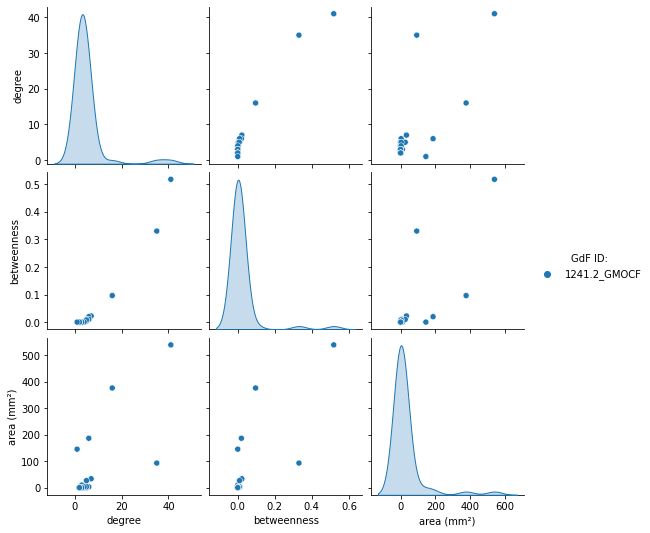

In [ ]:
data_RF49 = {n:{'degree':d,'betweenness':G_network_parameters['betweenenss'][n],'area (mm²)':area[n],'GdF ID:':id} for n,d in dict(G_network_parameters['degree']).items()}

data_RF49_df = pd.DataFrame.from_dict(data_RF49, orient='index')

sns.pairplot(data_RF49_df,hue='GdF ID:')

In [ ]:
frames = [data_207_df, data_RF49_df]

result = pd.concat(frames, axis=0, ignore_index=True)   

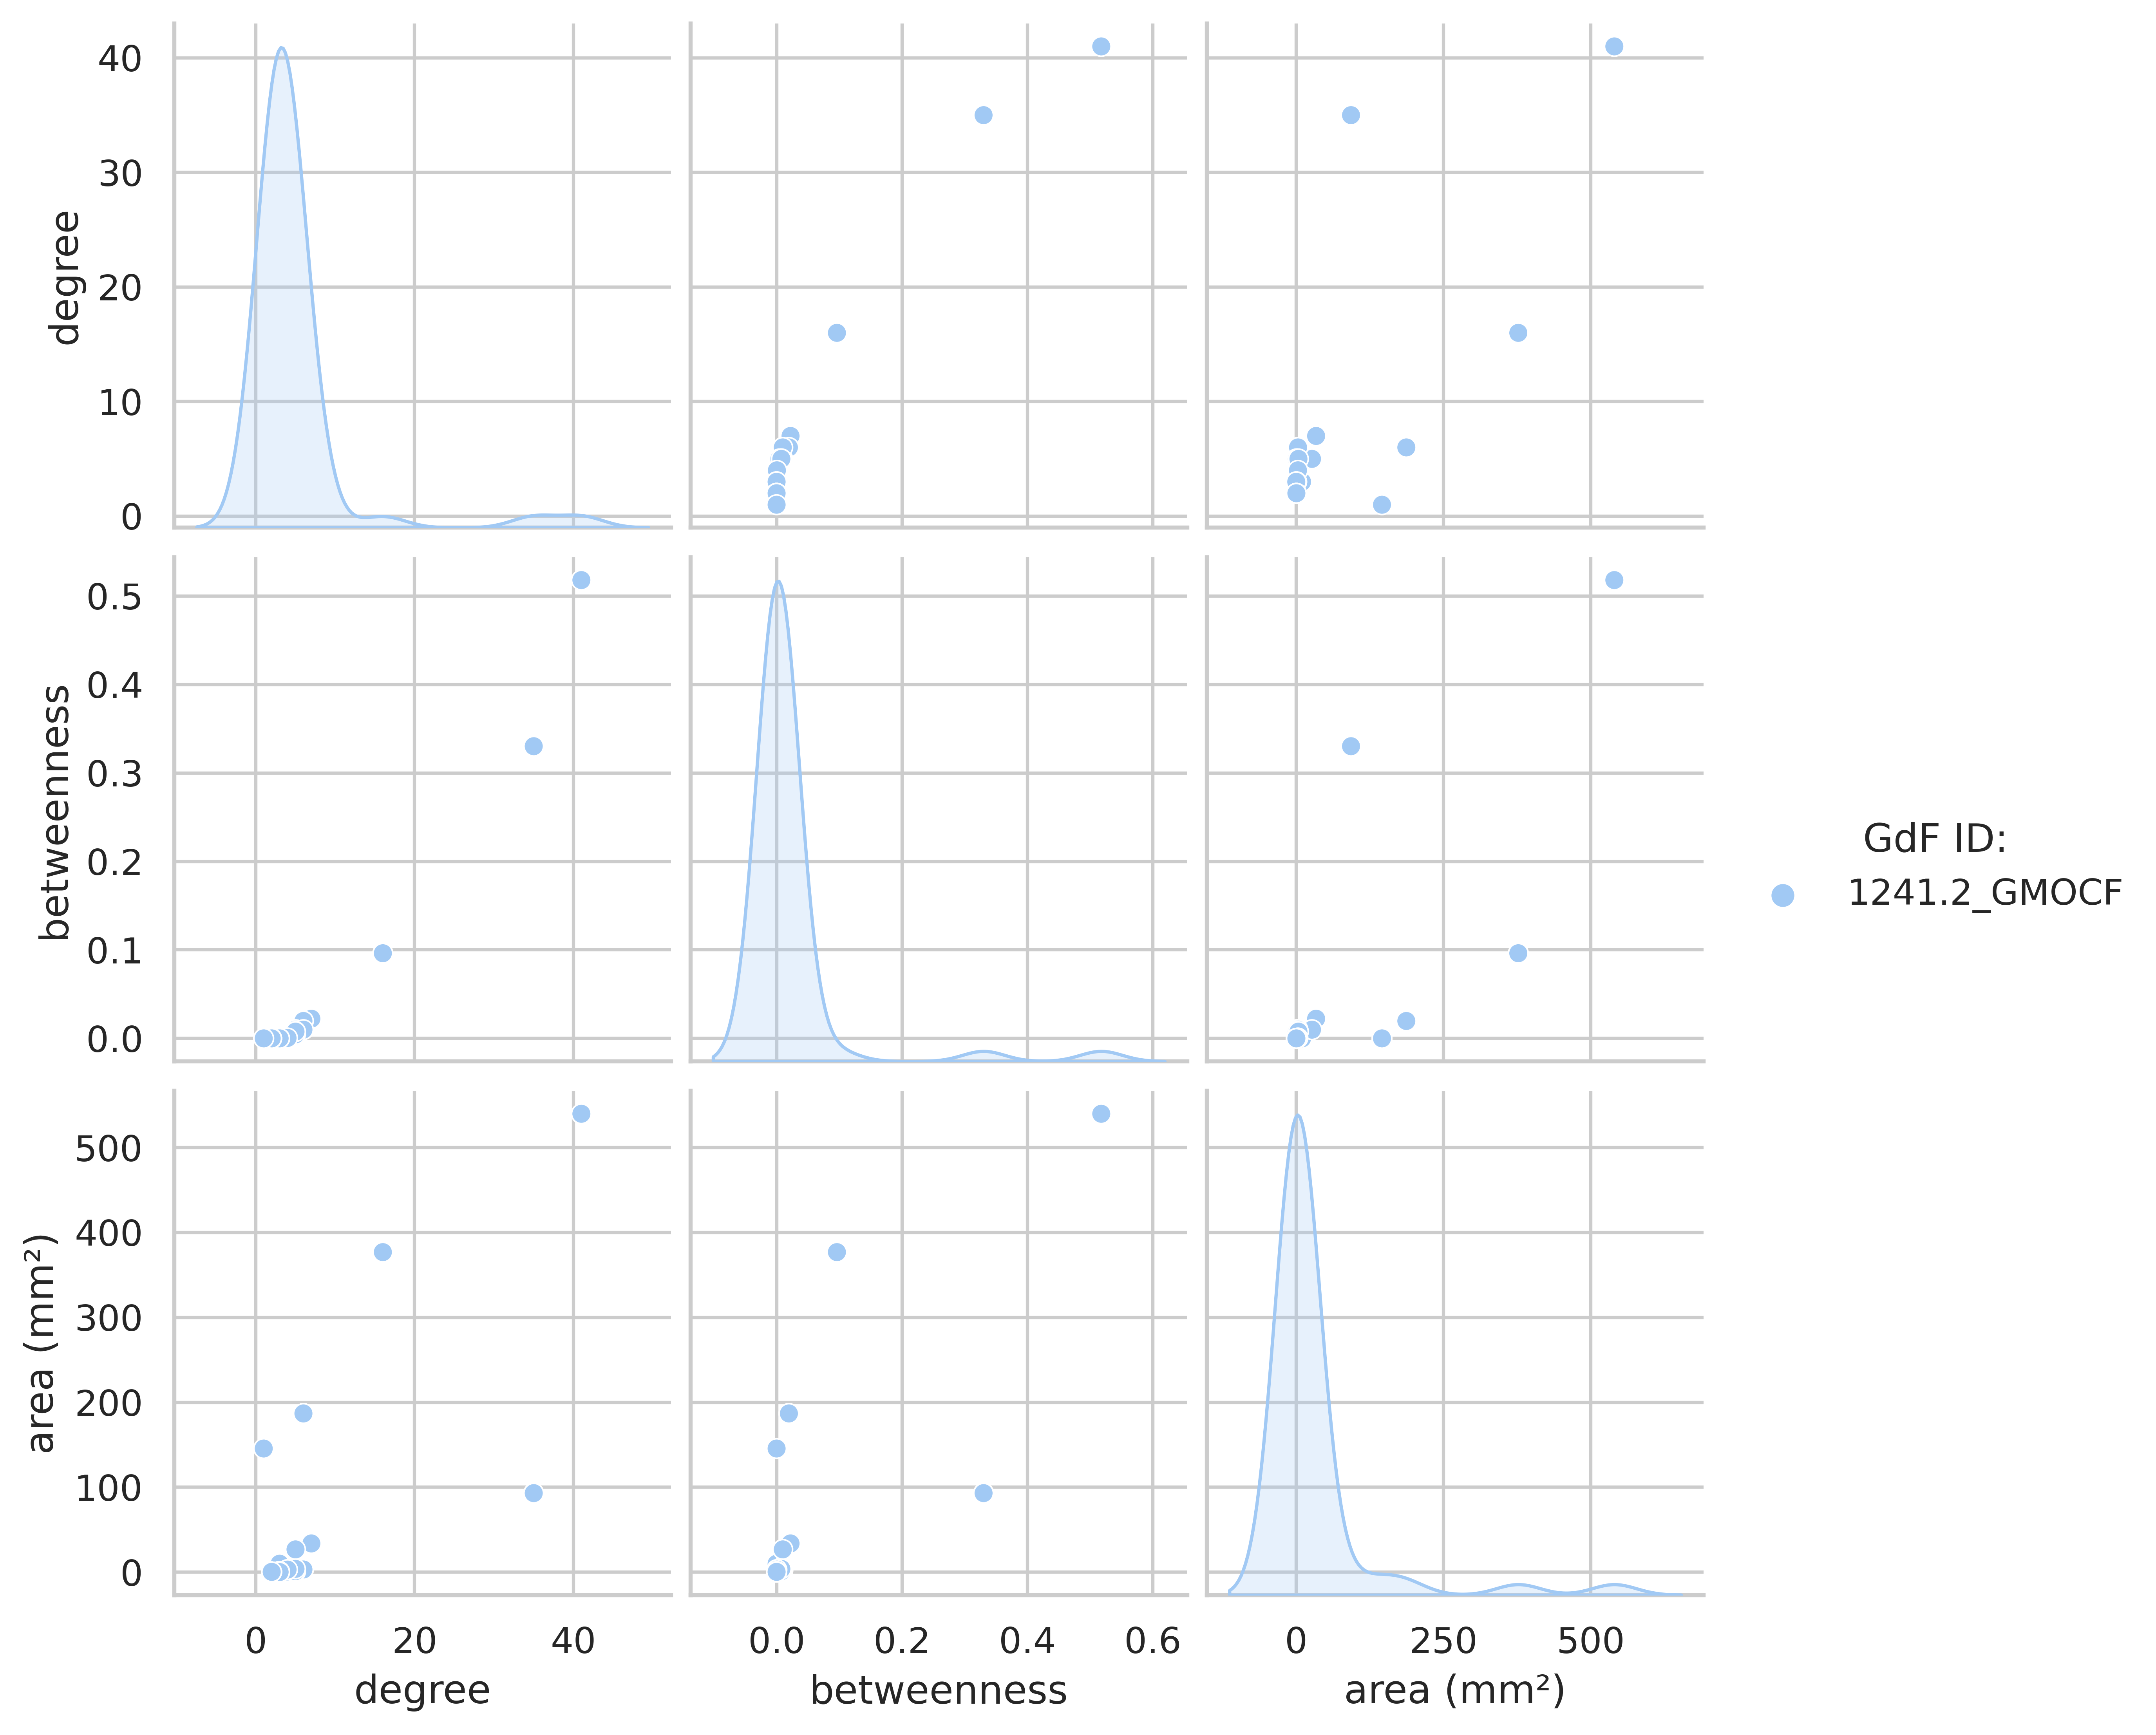

In [ ]:
sns.set_theme(style='whitegrid', 
              palette='pastel', 
              rc={'figure.dpi': 600, 'figure.figsize': (12, 8)})


sns.pairplot(result,hue='GdF ID:')


In [29]:
from Functions.main import labelledmesh_procedures,graph_procedures,MSII_chaineoperatoire_procedures

def graph_evaluation_procedure (obj,**kwargs):

    # LabelledMesh init
    path = kwargs ['path'] 
    id = kwargs ['id']
    processed = kwargs ['processed']
    labelname = kwargs ['labelname']
    exp_path = kwargs ['exp_path'] 
    eval = kwargs ['eval']
    para_name = kwargs ['para_name']

    # scales
    radius_scale = kwargs ['radius_scale'] 
    circumference_scale = kwargs ['circumference_scale'] 

    # Data import 
    obj.load_labelled_mesh(path,id,processed,labelname,exp_path) 
    obj.extract_ridges()

    # get polylines
    obj.polyline_to_nx()
    obj.polygraphs_to_polylines()

    # create node coordinates
    obj.get_centroids()
    # obj.get_NNs()
    # obj.get_NNs()

    # prepare for creating MSII1D_Pline object 
    obj.create_normals_vertices()
    obj.create_dict_mesh_info()
    obj.prepare_polyline()

    # prepare for get ridges and for scar-ridge-graph model and leading to chaine-operatoire 
    obj.prep_ridges()
    obj.polineline_segmenting()
    obj.segment_to_ridgegraph()

    obj.create_undirected_model(radius_scale,circumference_scale)

    obj.create_graph_model_selected_labels (eval)

    obj.export_graph_model_labels(obj.vert_dict, para_name)

def graph_procedures (method,**kwargs):

    GE = GraphEvaluation ()

    procedures = {'graph_evaluation':graph_evaluation_procedure}

    func = procedures.get(method)

    func(GE,**kwargs)

    return GE    

# 1241.2 (Robertinum)
para_name =  'betweenness'# 'degree'#'area'#
direction =  'greater'#'greater'#'greater'#
para_acc =  '0.72'# '0.71'# '0.78' # 

para_name = 'area'#'betweenness'# 'degree'#
direction =  'greater'#'greater'#'greater'#
para_acc =  '0.78'#'0.78'#'0.84'#

link_paras = '_' + '_'.join([para_name,direction, 'acc-{}'.format(para_acc),'links'])




# 207 (GdF)
# link_paras = '_area_greater_acc-0.84_eval_links'
# link_paras ='_betweeness_greater_acc-0.79_eval_links'
# link_paras ='_degree_greater_acc-0.78_eval_links'

# RF.c_49 (GdF)
# link_paras = '_area_less_acc-0.52_eval_links'
# link_paras ='_betweeness_less_acc-0.53_eval_links'
# link_paras ='_degree_less_acc-0.49_eval_links'


# link_paras ='_betweeness_greater_acc-0.72_eval_links'
# link_paras ='_degree_greater_acc-0.71_eval_links'

link_paras

eval = import_eval_links (path,id,link_paras)    

kwargs = {'path':path,
          'id':id,
          'processed':processed,
          'labelname':'_gt_labels',
          'exp_path':exp_path,
          'graphname':'normal',
          'radius_scale':radius_scale,
          'circumference_scale':circumference_scale,
          'eval':eval,
          'para_name': para_name
          }

G1 = graph_procedures('graph_evaluation', **kwargs)          

In [8]:

# graph_direct_parameter_procedure

# G1.vert_dict

In [6]:
def get_vertices_in_radius (mesh:object,
                            label_verts:dict,
                            neighs: dict,
                            dict_label: dict,
                            radius:float,
                            metadata: np.ndarray) -> dict:

    kdtree = mesh.kdtree
    vertices = mesh.vertices

    label_arr = {}

    for label,values in label_verts.items():

        label_arr [label] = {}

        for n,val in enumerate(values):

            label_arr [label] [val] = {}

            if neighs [val] == None:
                neighs [val] = {label}

            neighs [val].add(label)

            # get nearest points 
            indices_within_radius = kdtree.query_ball_point(vertices[val], radius)
            # vertices_within_radius = vertices[indices_within_radius]        

            for nei in neighs [val]:

                arr = np.empty((metadata.shape[1],),float) 

                for ind in indices_within_radius:

                    if dict_label[ind] == nei:

                        arr = np.vstack((arr, metadata[ind]))

                label_arr [label] [val] [nei] = arr

    return label_arr

In [7]:
from IntegralInvariants.II1DClasses import ChaineOperatoire
from Functions.Procedures.ChaineOperatoireProcedures import MSII_procedure,MSII_feature_vector_procedure

@timing
def filter_metadata (imp_metadata,parameters):

    if len(parameters) > 1:
        
        metadata = np.column_stack((imp_metadata [para] for para in parameters))
        
        return metadata
            
    elif len(parameters) == 1:

        metadata = np.array((imp_metadata [parameters[0]]))
        metadata = metadata.reshape(metadata.shape[0],1)

        return metadata
    
    else:
        return
    
@timing
def CO_concavity_procedure (obj,**kwargs):

    path = kwargs ['path'] 
    id = kwargs ['id']
    processed = kwargs ['processed']
    labelname = kwargs ['labelname']
    exp_path = kwargs ['exp_path'] 
    diameter = kwargs ['diameter'] 
    parameters = kwargs ['parameters'] 


    # Data import and data preparation 
    obj.prep_polygraphs(path,id,processed,labelname,exp_path)

    # Create 
    obj.prep_ridges()
    obj.extract_ridges()    

    # create node coordinates
    # obj.get_centroids()


    # get polylines
    obj.polyline_to_nx()
    obj.polygraphs_to_polylines()


    # prepare for creating MSII1D_Pline object 
    obj.create_normals_vertices()
    obj.create_dict_mesh_info()
    obj.prepare_polyline()

    #create MSII1D_Pline object and calculate the MSII-1D  
    # obj.polygraphs_to_nx()

    # obj.calc_II_new_sphere (diameter,n_rad)
    # obj.get_feature_vectors()

    # extract parameters, which are important to calculate CO concavity  
    mesh = obj.tri_mesh
    dict_label = obj.dict_label
    label_outline_vertices = obj.label_outline_vertices
    neighs = obj.ridge_neighbour_notshared_label  

    metadata = filter_metadata (mesh.metadata ['ply_raw']['vertex']['data'],
                                parameters)

    obj.label_arr = get_vertices_in_radius (mesh,
                                            label_outline_vertices,
                                            neighs,
                                            dict_label,
                                            diameter,
                                            metadata)    
    
    obj.label_arr_mean = {  vert:{nei: np.mean(params,axis=0)
                                for nei,params in neighs.items()
                                    if obj.dict_label[vert] != nei
                                } 
                          
                            for values in obj.label_arr.values() 
                                for vert,neighs in values.items()

                        }
    
@timing
def chaineoperatoire_procedures (method,**kwargs) -> object:
   
    CO = ChaineOperatoire()

    procedures = {'MSII':               MSII_procedure,
                  'MSII_feature_vector':MSII_feature_vector_procedure,
                  'CO_concavity':       CO_concavity_procedure}

    func = procedures.get(method)

    func(CO,**kwargs)

    return CO


# Chaine operatoire obejct

exp_path =              'exp_path/'
id =                    '207'  # 
# id = 'RF.c_49'
processed =             '_GMOCF_r1.00_n4_v256.volume'#'_GMOCF_gt_labels' #'_GMOCF'
labelname =             '_gt_labels'#'_Kmeans_labels'#
graphname =             'max'#'normal' # 'min' # 'max'# 'normal'
diameter =              1
n_rad =                 17    
radius_scale =          0.5
circumference_scale =   1
parameters =            ['quality']


#path = '/home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/{}/data/'.format(id)
path = '/home/linsel/Documents/PhD/Data/Fumane/V1.0.0_Linsel_et_al_2023/Graph/'


kwargs = {'path':       path,
          'id':         id,
          'processed':  processed,
          'labelname':  labelname,
          'exp_path':   exp_path,
          'graphname':  graphname,
          'diameter':   diameter,
          'parameters': parameters
          }



# print('LM1:')
# LM1 = labelledmesh_procedures('kmeans_sclice',**kwargs)

# print('LM2:')
# LM2 = labelledmesh_procedures('label_slice',**kwargs)

# print('LM1:')
# LM3 = labelledmesh_procedures('export_ridges_mesh',**kwargs)

# print('LM4:')
# LM4 = labelledmesh_procedures('kmeans_label',**kwargs) 



# print('CO3:')
# CO3 = chaineoperatoire_procedures('CO_concavity',**kwargs) 


# metadata = np.column_stack((mesh.metadata ['ply_raw']['vertex']['data']['nx'], 
#                             mesh.metadata ['ply_raw']['vertex']['data'] ['ny'],
#                             mesh.metadata ['ply_raw']['vertex']['data'] ['nz']))



ImportError: cannot import name 'ChaineOperatoire' from 'IntegralInvariants.II1DClasses' (/home/linsel/Documents/PhD/segmentation/prototyping/IntegralInvariants/II1DClasses.py)

In [8]:
def segment_pline_parameter (self,parameter):

    self.polineline_segmenting () 

    self.segments_funv = { 
                (label,n_l):    
                    {'funct_vals':[ parameter[v]
                                    for v in self.dict_plines[label]['vertices'] if n_l in self.ridge_neighbour_notshared_label[v]]}

                for label,neigh_labels in self.neighbouring_labels.items()
                for n_l in neigh_labels
                if n_l in self.neighbouring_labels[label]
            }

CO1.angle_feature_vector

CO3.label_arr_mean

NameError: name 'CO1' is not defined

In [18]:
# label_arr.values()
# label_arr.keys()
# segment_pline_parameter (self,parameter)
# segments_funv


class DiGraphEvaluation (PolylineGraphs):

    def __init__(self):
        super().__init__()

    def manual_operational_sequences_edges (self):

        edge_df = pd.read_csv(''.join([self.path,self.id,'_links','.csv']),
                                sep=',',header=0)

        self.manual_edges  = {(int(edge[0]),int(edge[1])) for _,edge in edge_df.iterrows()}

    def manual_operational_sequences_nodes_edges (self):

        nodes_df = pd.read_csv(''.join([self.path,self.id,'_nodes','.csv']),
                                sep=',',header=0)

        self.manual_nodes = {node[-1]: {nodes_df.columns[n]:para for n,para in enumerate(node[:-1])} 
                    
                        for _,node in nodes_df.iterrows()
                        }
        
        edge_df = pd.read_csv(''.join([self.path,self.id,'_links','.csv']),
                                sep=',',header=0)

        
        self.manual_edges = {(int(nodes_df[nodes_df['node'] == edge['source']]['gt_label']),
                        int(nodes_df[nodes_df['node'] == edge['target']]['gt_label']))
                    
                        for _,edge in edge_df.iterrows()}

    def export_max_angle (obj,label_arr_mean):


        origin = np.array([ 0.00000000001,
                            0.00000000001,
                            0.00000000001])

        max_edge_angle = {vert: max([abs(angle_between_vectors(vals[obj.dict_label[vert]] + origin, 
                                        origin,
                                        normal+origin) [0])

                                    for nei, normal in vals.items() 
                                        if math.isnan(angle_between_vectors(   vals[obj.dict_label[vert]] + origin, 
                                        origin,
                                        normal+origin)[0]) != True
                                    ], key=abs)
                                for vert,vals in label_arr_mean.items()
                        }

        write_labels_txt_file ( max_edge_angle, 
                                ''.join ([  obj.path, 
                                            obj.id,
                                            '_'.join([  '',
                                                        'edge-angle',
                                                        'labels'])
                                        ])
                                )

def get_max_func_val (obj,label_arr_mean):    

    obj.max_func_val = {vert:   max([func_val
                                        for func_val in vals.values() 
                                    ], key=abs) [0]

                                for vert,vals in label_arr_mean.items()
                        }
    
def export_max_func_val (obj,label_arr_mean,func_val_name):    

    max_func_val = {vert: max([func_val

                                for func_val in vals.values() 
                            ], key=abs) [0]
                        for vert,vals in label_arr_mean.items()
                    }
    write_labels_txt_file ( max_func_val, 
                            ''.join ([  obj.path, 
                                        obj.id,
                                        '_'.join([  '',
                                                    func_val_name,
                                                    'labels'])
                                    ])
                            )    

@timing
def segment_to_ridgegraph (self):
    self.G_ridges = nx.Graph()

    self.mean_segments_funv_node = {}

    self.mean_segments_funv = {}        
    self.mean_maxsegments_funv = {}
    self.mean_minsegments_funv = {}                

    for edge,nodes in self.segments.items():
        if nodes != {'vertices': []}:

            self.G_ridges.add_nodes_from(edge)
            self.G_ridges.add_edge(*edge,
                                    nodes = nodes['vertices'],
                                    length = len(nodes['vertices']),
                                    
                                    funct_vals = self.segments_funv[edge]['funct_vals'],
                                    max = np.round(np.max(self.segments_funv[edge]['funct_vals'])),
                                    mean = np.mean(self.segments_funv[edge]['funct_vals']),
                                    med = np.median(self.segments_funv[edge]['funct_vals']),
                                    std = np.std(self.segments_funv[edge]['funct_vals']),
                                    var = np.var(self.segments_funv[edge]['funct_vals']))
    
            for node in nodes['vertices']:
                
                self.mean_segments_funv_node [node] = {}
                
                self.mean_segments_funv_node [node] = np.mean(self.segments_funv[edge]['funct_vals'])

            # self.mean_angle_edge[edge] = {}
            # self.mean_maxangle_edge[edge] = {}
            # self.mean_minangle_edge[edge] = {}                

            self.mean_segments_funv[edge] = np.mean(self.segments_funv[edge]['funct_vals'])
            self.mean_maxsegments_funv[edge] = np.max(self.segments_funv[edge]['funct_vals'])
            self.mean_minsegments_funv[edge] = np.max(self.segments_funv[edge]['funct_vals'])

        else:
            # self.mean_angle_edge[edge] = {}
            # self.mean_maxangle_edge[edge] = {}
            # self.mean_minangle_edge[edge] = {}                

            self.mean_segments_funv[edge] = 0
            self.mean_maxsegments_funv[edge] = 0
            self.mean_minsegments_funv[edge] = 0

def eval (obj, path, id):

    edges = get_manual_edges(path, id)

    DiG_ridges_edges = {}

    segment_to_ridgegraph(obj) # obj.segment_to_ridgegraph()

    obj.ridge_pairs()

    obj.direct_ridgegraph()

    obj.get_G_ridge_properties()

    obj.get_DiG_ridge_properties(graphname)

    ridgepairs = {  ridge:values['bigger_smaller'] * values['difference'] 
                    
                    for ridge,values in obj.ridges_pairs.items() 
                        if values ['bigger_smaller'] != 0.0
                }

    print(ridgepairs)

    DiG_ridges_edges = set(obj.DiG_ridges[graphname].edges)

    edges_turned = {(edge[1],edge[0]) for edge in edges}

    # directededges_parameters(edges,edges_turned,'turned')
    evaluate_directed_edges(DiG_ridges_edges, edges_turned)

    evaluate_directed_edges(DiG_ridges_edges, edges)

    evaluate_directed_edges(edges_turned, DiG_ridges_edges)

    evaluate_directed_edges(edges,DiG_ridges_edges)

# get_max_func_val (CO3,CO3.label_arr_mean)  

# segment_pline_parameter(CO3,CO3.max_func_val)

path_1 = '/home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/{}/data/'.format(id)

eval(CO3,path_1,id)

# CO3.ridge_pairs ()

# CO3.segments_funv

NameError: name 'timing' is not defined

In [ ]:
def get_max_edge_angle (obj,label_arr_mean):


    origin = np.array([ 0.00000000001,
                        0.00000000001,
                        0.00000000001])

    max_edge_angle = {vert: max([abs(angle_between_vectors(vals[obj.dict_label[vert]] + origin, 
                                    origin,
                                    normal+origin) [0])

                                for nei, normal in vals.items() 
                                    if math.isnan(angle_between_vectors(   vals[obj.dict_label[vert]] + origin, 
                                    origin,
                                    normal+origin)[0]) != True
                                ], key=abs)
                            for vert,vals in label_arr_mean.items()
                    }

    write_labels_txt_file ( max_edge_angle, 
                            ''.join ([  obj.path, 
                                        obj.id,
                                        '_'.join([  '',
                                                    'edge-angle',
                                                    'labels'])
                                    ])
                            )

In [ ]:
from Functions.BasicMSII1D import test_nodes_two_neigh,angle_between_vectors

import math

def get_max_edge_angle (obj,label_arr_mean):

    

    origin = np.array([ 0.00000000001,
                        0.00000000001,
                        0.00000000001])

    max_edge_angle = {vert: max([abs(angle_between_vectors(vals[obj.dict_label[vert]] + origin, 
                                    origin,
                                    normal+origin) [0])

                                for nei, normal in vals.items() 
                                    if math.isnan(angle_between_vectors(   vals[obj.dict_label[vert]] + origin, 
                                    origin,
                                    normal+origin)[0]) != True
                                ], key=abs)
                            for vert,vals in label_arr_mean.items()
                    }

    write_labels_txt_file ( max_edge_angle, 
                            ''.join ([  obj.path, 
                                        obj.id,
                                        '_'.join([  '',
                                                    'edge-angle',
                                                    'labels'])
                                    ])
                            )


get_max_edge_angle (CO1,label_arr_mean)  

{24576: {1: array([-0.06056781,  0.10542984,  0.26634283]), 2: array([ 0.56882804,  0.13900547, -1.13363517])}, 196608: {1: array([-0.74891599,  0.00933603,  0.1684518 ]), 2: array([-0.42148125, -0.01656454, -1.25966447])}, 196609: {1: array([-0.75709081,  0.01025356,  0.13351   ]), 2: array([-0.42702311, -0.01823595, -1.25213831])}, 40963: {1: array([-0.97745851,  0.23753971, -0.83929312]), 2: array([-0.12066745,  0.03309768, -1.56809787])}, 73734: {1: array([-1.0371066 ,  0.24729062, -0.5159077 ]), 2: array([-0.29822824, -0.03320295, -1.46353604])}, 172043: {1: array([0.30933394, 0.16343413, 0.36178795]), 2: array([ 0.43306929,  0.23418568, -1.34724877])}, 32783: {1: array([-0.10849519,  0.08199978,  0.3380703 ]), 2: array([ 0.5576423 ,  0.11129861, -1.13274148])}, 147473: {1: array([0.17159967, 0.21045678, 0.36175873]), 2: array([ 0.46261813,  0.21157117, -1.33877478])}, 114713: {1: array([ 0.36861669, -0.19143596,  0.22020048]), 2: array([ 0.26534656,  0.19785325, -1.45031628])}, 3

/home/linsel/Documents/PhD/segmentation/prototyping/Functions/BasicMSII1D.py:59: RuntimeWarning: invalid value encountered in arccos
  theta = np.arccos(np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2)))
/home/linsel/Documents/PhD/segmentation/prototyping/Functions/BasicMSII1D.py:67: RuntimeWarning: invalid value encountered in true_divide
  k = rotation_axis / np.linalg.norm(rotation_axis)


In [ ]:
def test_2 (dict_label,neigh,label_arr):

    dict_neighs = {}

    for k,neighs in neigh.items():

        dict_neighs [k] = {dict_label[k]}

        for nei in neighs:

            dict_neighs [k].add (nei)  

        
    print(dict_neighs)

   

test_2(CO1.dict_label, CO1.ridge_neighbour_notshared_label,1)

# 


{42: {3, 4, 22}, 59: {1, 4, 22}, 83: {1, 22}, 103: {1, 7}, 104: {1, 7}, 105: {1, 7}, 133: {1, 3}, 135: {1, 4, 6}, 138: {8, 1, 3}, 142: {1, 4, 6}, 143: {1, 4, 6}, 144: {1, 4, 6}, 152: {3, 4, 22}, 159: {1, 4, 22}, 163: {8, 9, 1}, 164: {8, 9, 1}, 215: {1, 4, 22}, 220: {1, 22}, 238: {2, 5, 6}, 239: {3, 5, 6}, 267: {1, 4, 22}, 288: {1, 4, 6}, 289: {3, 4, 22}, 299: {1, 4, 22}, 300: {1, 4, 22}, 306: {1, 4, 22}, 314: {1, 22}, 347: {1, 22}, 352: {1, 10}, 355: {1, 4, 22}, 382: {1, 4, 22}, 384: {1, 22}, 386: {1, 22}, 395: {1, 3, 22}, 400: {1, 3, 5}, 401: {2, 3, 5}, 404: {1, 22}, 406: {2, 3, 6}, 407: {1, 2, 6}, 412: {1, 3, 4, 22}, 413: {1, 2, 6}, 414: {1, 2, 6}, 418: {1, 4, 22}, 423: {1, 3, 22}, 437: {1, 3, 22}, 440: {1, 4, 6}, 441: {3, 4, 6}, 451: {1, 3, 22}, 452: {1, 3}, 454: {1, 2}, 471: {1, 3}, 474: {1, 3}, 476: {1, 6}, 477: {1, 3, 6}, 478: {1, 3, 6}, 487: {1, 3}, 489: {1, 3}, 491: {1, 3}, 506: {1, 3}, 511: {1, 3}, 513: {1, 3}, 516: {1, 3}, 547: {1, 3}, 554: {1, 3}, 557: {1, 3}, 559: {1, 3}, 5

In [ ]:
np.mean (label_arr[1], axis = 0)

array([ 0.41775558, -0.03002575, -0.06350131])

In [ ]:
list(mesh.tri_mesh.metadata ['ply_raw']['vertex']['data'].dtype.names)

# mesh.tri_mesh.metadata ['ply_raw']['vertex']['data'][list(mesh.tri_mesh.metadata ['ply_raw']['vertex']['data'].dtype.names)]

['x',
 'y',
 'z',
 'quality',
 'flags',
 'red',
 'green',
 'blue',
 'nx',
 'ny',
 'nz',
 'labelid']

In [ ]:
from Functions.EssentialLabelAlteration import get_unique_labels,get_uniquelabel_vertlist,get_labels_IoU_max,get_labels_IoU,label_vertices

def label_connections_nodes (self):

    label_vertices( self,
                    0,
                    self.connections_mesh.vertices,
                    # [''.join([f"{edges[0]:02}",'0',f"{edges[1]:02}"]) for edges in self.G_ridges.edges],
                    [num for num,_ in enumerate(self.G_ridges.edges)], 
                    '_connections')

    label_vertices( self, 
                    len(self.connections_mesh.vertices),
                    self.nodes_mesh.vertices,
                    self.G_ridges.nodes,
                    '_nodes')

GE1.processed = processed

GE1.label_connections_nodes ()

# Manual Edges

In [2]:
import os,sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from util import *

from DetermineRidges.RidgeAnalysis import PolylineGraphs,LabelledMesh
# from IntegralInvariants.II1DClasses import MSIIGraphs,MSIIPline
# from Classes.BasicClasses import manualEdges

from Functions.BasicMSII1D import angle_between_vectors

from Functions.main import labelledmesh_procedures,graph_procedures,MSII_chaineoperatoire_procedures


# Functions  for creating 3D shaped connections of graph models
# from Classes.Primitive_3D.EdgeShapes3D import generate_unitarrow,generate_unitconnection
from Functions.Essential3DPlotting import create_node_sphere,arrow_trafomat,create_rotated_arrow,connection_trafomat,create_rotated_connection


from Functions.EssentialLabelAlteration import get_unique_labels,get_uniquelabel_vertlist,get_labels_IoU_max,get_labels_IoU

# compare two operational sequences 
from Functions.EvaluateGraph import evaluate_directed_edges,directededges_parameters,less_equal_greater

from Functions.EssentialEdgesFunctions import get_manual_edges

# import timing function decorator  
from Functions.EssentialDecorators import timing

from collections import Counter

In [4]:
# 
class ChaineOperatoire (PolylineGraphs):

    def __init__(self):
        super().__init__()

    def edges_to_ridgegraph(self):

        self.G_ridges = nx.Graph()

        for edge in self.manual_edges:
            self.G_ridges.add_nodes_from(edge)
            self.G_ridges.add_edge(*edge)

    def direct_ridgegraph(self,):

        self.DiG_manual = nx.DiGraph()

        for edge in self.manual_edges:
            self.DiG_manual.add_nodes_from(edge)
            self.DiG_manual.add_edge(*edge)

    def create_direct_ridgegraph(directed_edges):
        
        directed_ridges = nx.DiGraph()

        for edge,weight in directed_edges.items():
            directed_ridges.add_nodes_from(edge)
            directed_ridges.add_edge(*edge,weight = weight)

        return directed_ridges            

    def create_chaine_operatoire (  self,
                                    circumference,
                                    radius):

        self.create_arrows_mesh(self.DiG_manual,
                                circumference)

        self.create_nodes_mesh( self.centroids,
                                radius)

        self.create_ridges_mesh()

        self.ridges_arrows = trimesh.util.concatenate([ self.arrows_mesh,
                                                        self.nodes_mesh,
                                                        self.ridges_mesh])        

        self.ridges_arrows.export(''.join ([self.path, 
                                            self.id,
                                            self.edge_name,
                                            '_ridges_arrows', 
                                            '.ply']),
                                            file_type='ply')
  
    def create_arrows_mesh (self, 
                            DiG,
                            circumference):

        arrow_list = [create_rotated_arrow (edge,self.centroids,circumference)[1] for edge in DiG.edges]

        self.arrows_mesh = trimesh.util.concatenate(arrow_list)

    def create_chaine_operatoire_labels (self):
        vert_dict = {n_vert:1 for n_vert in range(0,len(self.arrows_mesh.vertices))}
        vert_dict.update({len(vert_dict.keys()) + n_vert + 1:2 for n_vert in range(0,len(self.nodes_mesh.vertices))})
        vert_dict.update({len(vert_dict.keys()) + n_vert + 1:3 for n_vert in range(0,len(self.ridges_mesh.vertices))})
        self.vert_dict = vert_dict

    def create_chaine_operatoire_functvals (self,manu_type):

        num_arrow_verts = int(len(self.arrows_mesh.vertices)/len(self.DiG_manual.edges))

        mE = manualEdges()
        if manu_type == 'edges':
            mE.import_edges(self.path, self.id )
            
        elif manu_type == 'edges_nodes':
            mE.import_edges_nodes(self.path, self.id )

        else:
            print('no reference for edges provided')
            return          

        edges = mE.manual_edges

        correct_edges,_ = evaluate_directed_edges(edges,self.manual_edges)

        self.arrow_dict_funcval = {}

        for n,edge in enumerate(self.DiG_manual.edges):
            for i in range (0 + n * num_arrow_verts, 99 + n * num_arrow_verts):
                if edge in correct_edges.keys():
                    self.arrow_dict_funcval [i] = 2  
                elif edge not in correct_edges.keys():                
                    self.arrow_dict_funcval [i] = 1 

                # self.arrow_dict_funcval [i] = correct_edges[edge]


        vert_dict = {n_vert:self.arrow_dict_funcval[n_vert] for n_vert in range(0,len(self.arrows_mesh.vertices))}
        vert_dict.update({len(vert_dict.keys()) + n_vert + 1:2 for n_vert in range(0,len(self.nodes_mesh.vertices))})
        vert_dict.update({len(vert_dict.keys()) + n_vert + 1:3 for n_vert in range(0,len(self.ridges_mesh.vertices))})
        self.vert_dict = vert_dict        

    def export_chaine_operatoire_labels (self,label_dict):

        print(''.join([ self.path, 
                                                    self.id, 
                                                    self.edge_name,
                                                    '_label']))

        write_labels_txt_file (label_dict,''.join([ self.path, 
                                                    self.id, 
                                                    self.edge_name,
                                                    '_label'])) 

    def export_chaine_operatoire_functvals (self,label_dict):

        write_labels_txt_file (label_dict,''.join([ self.path, 
                                                        self.id, 
                                                        self.edge_name,
                                                        '_functval']))          
  
    def segment_pline_manual(self):
       
        self.segments = { 
                    (label,n_l):    
                        {'vertices':[ v
                                        for v in self.dict_plines[label]['vertices'] if n_l in self.dict_ridge_notshared_label[v]]}

                    for label,neigh_labels in self.neighbouring_labels.items()
                    for n_l in neigh_labels
                    if n_l in self.neighbouring_labels[label]
                }
    def export_DiG_gexf (self):

        nx.write_gexf(self.DiG_manual, ''.join([self.path, 
                                                self.id,
                                                'edge_name',
                                                '_ridges_arrows',
                                                '.gexf']))


In [43]:
# manual ChaineOperatoire
from Classes.BasicClasses import manualEdges


# @timing
def edge_to_arrow_procedure (obj,**kwargs):

    path = kwargs ['path'] 
    id = kwargs ['id']
    processed = kwargs ['processed']
    labelname = kwargs ['labelname']
    exp_path = kwargs ['exp_path'] 
    circumference = kwargs ['circumference'] 
    radius = kwargs ['radius']
    manu_type = kwargs['manual_type']
    edge_name = kwargs['edge_name']

    # Data import and data preparation 
    obj.prep_polygraphs(path,id,processed,labelname,exp_path)
    obj.prep_ridges()

    # create node coordinates
    obj.get_centroids()

    mE = manualEdges()
    if manu_type == 'edges':
        mE.import_edges(path,id + edge_name)
        
    elif manu_type == 'edges_nodes':
        mE.import_edges_nodes(path,id + edge_name)

    else:
        print('no reference for edges provided')
        return          

    obj.edge_name = edge_name

    obj.manual_edges = mE.manual_edges
    del mE    

    obj.edges_to_ridgegraph()

    obj.direct_ridgegraph()

    obj.create_chaine_operatoire(circumference,radius)

    obj.create_chaine_operatoire_labels()
    # obj.create_chaine_operatoire_functvals(manu_type)
    # obj.export_chaine_operatoire_functvals (obj.vert_dict)

    obj.export_DiG_gexf()

def co_procedures (method,**kwargs):

    MCO = ChaineOperatoire ()

    procedures = {'edge_to_arrow':edge_to_arrow_procedure}

    func = procedures.get(method)

    func(MCO,**kwargs)

    return MCO        



In [13]:
# Chaine operatoire obejct


exp_path = 'exp_path/'
#id = '207'  # 
id = 'RF.c_49'
processed = '_GMOCF_r1.00_n4_v256.volume'#'_GMOCF_gt_labels' #'_GMOCF'
labelname = '_gt_labels'#'_Kmeans_labels'#
graphname = 'normal' # 'min' # 'max'# 'normal'
diameter = 10
n_rad = 17    
radius_scale = 0.5
circumference_scale = 1
manual_type = 'edges_nodes' #'edges'
 
path = '/home/linsel/Documents/PhD/Data/Fumane/V1.0.0_Linsel_et_al_2023/Graph/CO/{}/'.format(id)

# kwargs = {'path':path,
#           'id':id,
#           'processed':processed,
#           'labelname':labelname,
#           'exp_path':exp_path,
#           'graphname':graphname,
#           'diameter':diameter,
#           'n_rad':n_rad}

kwargs = {'path':path,
          'id':id,
          'processed':processed,
          'labelname':labelname,
          'exp_path':exp_path,
          'circumference':circumference_scale,
          'radius':radius_scale,
          'manual_type':manual_type}


# print('LM1:')
# MCO1 = co_procedures('edge_to_arrow',**kwargs)



In [44]:
# Chaine operatoire obejct


exp_path = 'exp_path/'
# id = '207'  # 
# id = 'RF.c_49'
processed = '_r1.50_n4_v256.volume'#'_GMOCF_gt_labels' #'_GMOCF'
labelname = '_gt_labels'#'_Kmeans_labels'#
graphname = 'normal' # 'min' # 'max'# 'normal'
diameter = 10
n_rad = 17    
radius_scale = 0.5
circumference_scale = 1
manual_type = 'edges'#_nodes' #'edges'
path = '/home/linsel/Documents/PhD/Data/Robertinum/1241.2/arrows/'
edge_name = '_betweenness_equal_acc-0.03_links.csv'#'_area_greater_acc-0.78_links.csv'
edge_name[:-4]
# path = '/home/linsel/Documents/PhD/Data/Fumane/V1.0.0_Linsel_et_al_2023/Graph/CO/{}/'.format(id)

# kwargs = {'path':path,
#           'id':id,
#           'processed':processed,
#           'labelname':labelname,
#           'exp_path':exp_path,
#           'graphname':graphname,
#           'diameter':diameter,
#           'n_rad':n_rad}
if edge_name.endswith('_links.csv') and edge_name.endswith('eval_links.csv') == False:
    kwargs = {'path':path,
                'id':id,
                'processed':processed,
                'labelname':labelname,
                'exp_path':exp_path,
                'circumference':circumference_scale,
                'radius':radius_scale,
                'manual_type':manual_type,
                'edge_name': edge_name[:-10]}


# print('LM1:')
    MCO1 = co_procedures('edge_to_arrow',**kwargs)  
    del MCO1


FileNotFoundError: [Errno 2] No such file or directory: '/home/linsel/Documents/PhD/Data/Robertinum/1241.2/arrows/1241.2_GMOCF_betweenness_equal_acc-0.03_links.csv'

In [45]:
# exp_path = 'exp_path/'
# id = '207'  # 
# id = 'RF.c_49'
# processed = '_GMOCF_r1.00_n4_v256.volume'#'_GMOCF_gt_labels' #'_GMOCF'
# labelname = '_gt_labels'#'_Kmeans_labels'#
# graphname = 'normal' # 'min' # 'max'# 'normal'
# diameter = 10
# n_rad = 17    
# radius_scale = 0.5
# circumference_scale = 1

 
# path = '/home/linsel/Documents/PhD/Data/Fumane/V1.0.0_Linsel_et_al_2023/Graph/CO/{}/'.format(id)

# # kwargs = {'path':path,
# #           'id':id,
# #           'processed':processed,
# #           'labelname':labelname,
# #           'exp_path':exp_path,
# #           'graphname':graphname,
# #           'diameter':diameter,
# #           'n_rad':n_rad}

exp_path = 'exp_path/'
id = '1241.2_GMOCF'#_GMOCF_r1.50_n4_v256.volume'  # 'MoST_3411_GMOCF'#
# id = 'RF.c_49'
processed = '_r1.50_n4_v256.volume'#'_GMOCF_gt_labels' #'_GMOCF'
labelname = '_gt_labels'#'_Kmeans_labels'#
graphname = 'normal' # 'min' # 'max'# 'normal'
diameter = 1
n_rad = 17    
radius_scale = 0.5
circumference_scale = 1
manual_type = 'edges' #'edges'

#path = '/home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/{}/data/'.format(id)
# path = '/home/linsel/Documents/PhD/Data/Fumane/V1.0.0_Linsel_et_al_2023/Graph/CO/{}/'.format(id)
# path = '/home/linsel/Documents/PhD/Data/stonetoolsmuseum/MoST_3411/'
path = '/home/linsel/Documents/PhD/Data/Robertinum/1241.2/arrows/'

# kwargs = {'path':path,
#           'id':id,
#           'processed':processed,
#           'labelname':labelname,
#           'exp_path':exp_path,
#           'graphname':'normal',
#           'diameter':diameter,
#           'n_rad':n_rad}


# kwargs = {'path':path,
#           'id':id,
#           'processed':processed,
#           'labelname':'_gt_labels',
#           'exp_path':exp_path,
#           'graphname':'normal',
#           'radius_scale':radius_scale,
#           'circumference_scale':circumference_scale
#           }
 

for edge_name in os.listdir (path):
    print(edge_name)
    if edge_name.endswith('_links.csv') and edge_name.endswith('eval_links.csv') == False:
        print(edge_name[len(id):-10])
        kwargs = {'path':path,
                  'id':id,
                  'processed':processed,
                  'labelname':labelname,
                  'exp_path':exp_path,
                  'circumference':circumference_scale,
                  'radius':radius_scale,
                  'manual_type':manual_type,
                  'edge_name': edge_name[len(id):-10]}

        # print('LM1:')
        MCO1 = co_procedures('edge_to_arrow',**kwargs)




1241.2_GMOCFedge_name_ridges_arrows.gexf
1241.2_GMOCF_betweenness_greater_acc-0.72_links.csv
_betweenness_greater_acc-0.72
1241.2_GMOCF_area_greater_acc-0.78_ridges_arrows.ply
1241.2_GMOCF_area_greater_acc-0.78_links.csv
_area_greater_acc-0.78
1241.2_GMOCF_links.csv

1241.2_GMOCF_r1.50_n4_v256.volume.ply
1241.2_GMOCF_area_label.txt
.~lock.1241.2_GMOCF_degree_less_acc-0.21_links.csv#
exp_path
1241.2_GMOCF_ridge_connections.ply
.~lock.1241.2_GMOCF_betweenness_greater_acc-0.72_links.csv#
1241.2_GMOCF_gt_labels.txt
.~lock.1241.2_GMOCF_links.csv#
1241.2_GMOCF_betweenness_greater_acc-0.72_eval_links.csv
1241.2_GMOCF_degree_greater_acc-0.71_eval_links.csv
1241.2_GMOCF_area_greater_acc-0.78_eval_links.csv
.~lock.1241.2_GMOCF_area_greater_acc-0.78_eval_links.csv#
1241.2_GMOCF_ridges_arrows.ply
1241.2_GMOCF_betweenness_greater_acc-0.72_ridges_arrows.ply


# Functions

In [62]:
# Functions  for creating 3D shaped connections of graph models
# from Classes.Primitive_3D.EdgeShapes3D import generate_unitarrow,generate_unitconnection
from Functions.Essential3DPlotting import create_node_sphere,arrow_trafomat,create_rotated_arrow,connection_trafomat,create_rotated_connection


from Functions.EssentialLabelAlteration import get_unique_labels,get_uniquelabel_vertlist,get_labels_IoU_max,get_labels_IoU

# compare two operational sequences 
from Functions.EvaluateGraph import evaluate_directed_edges,directededges_parameters,less_equal_greater

from Functions.EssentialEdgesFunctions import get_manual_edges

# import timing function decorator  
from Functions.EssentialDecorators import timing

from collections import Counter

### new functions

In [4]:
# Chaine operatoire obejct

exp_path = 'exp_path/'
id = '207'  # 
# id = 'RF.c_49'
processed = '_GMOCF_gt_labels' #'_GMOCF'
labelname = '_gt_labels'
graphname = 'normal' # 'min' # 'max'# 'normal'
diameter = 10
n_rad = 17    
radius_scale = 0.5
circumference_scale = 1

#path = '/home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/{}/data/'.format(id)
path = '/home/linsel/Documents/PhD/Data/Fumane/V1.0.0_Linsel_et_al_2023/Graph/'

kwargs = {'path':path,
          'id':id,
          'processed':processed,
          'labelname':labelname,
          'exp_path':exp_path,
          'graphname':'normal',
          'diameter':diameter,
          'n_rad':n_rad}


kwargs = {'path':path,
          'id':id,
          'processed':processed,
          'labelname':'_gt_labels',
          'exp_path':exp_path,
          'graphname':'normal',
          'radius_scale':radius_scale,
          'circumference_scale':circumference_scale
          }

# print('LM1:')
# LM1 = labelledMesh_procedures('kmeans_sclice',**kwargs)

# print('LM2:')
# LM2 = labelledMesh_procedures('label_slice',**kwargs)

# print('LM1:')
# LM3 = labelledMesh_procedures('export_ridges_mesh',**kwargs)

# print('CO1:')
# CO1 = ChaineOperatoire_procedures('MSII',**kwargs) #{'MSII':MSII_procedure,'MSII_feature_vector':MSII_feature_vector_procedure}

# print('CO2:')
# CO2 = ChaineOperatoire_procedures('MSII_feature_vector',**kwargs)

print('DGA1:')
DGA1 = labelledMesh_procedures ('direct_graph_area',**kwargs)

# print('GE1:')
# GE1 = evaluation_procedures ('graph_evaluation',**kwargs)


1
2
3


In [ ]:
exp_path = 'exp_path/'
id = '207'  # 
# id = 'RF.c_49'
processed = '_GMOCF_gt_labels'#'_GMOCF'

In [21]:
files = os.listdir(path=path)

for file in files:

    if file.endswith('.ply') == True:

        filename = file.split('_')
        id = filename [0]   

        if id + '_ridge_connections.ply' in files:
            continue
        
        id = filename [0]
        processed = file [len(id) :-4]

        kwargs =    {'path':path,
                    'id':id,
                    'processed':processed,
                    'labelname':'_gt_labels',
                    'exp_path':exp_path,
                    'graphname':'normal',
                    'radius_scale':radius_scale,
                    'circumference_scale':circumference_scale
                    }
        
        evaluation_procedures ('graph_evaluation',**kwargs)


In [ ]:
files = os.listdir(path=path)

for file in files:
    if file.endswith('.ply') == True and file.endswith('connections.ply') != True  :
        
        filename = file.split('_')

        id = filename [0]
        processed = file [len(id) :-4]
        print (id)
        print (processed)
        kwargs = {'path':path,
                'id':id,
                'processed':processed,
                'labelname':'_gt_labels',
                'exp_path':exp_path,
                'graphname':'normal',
                'radius_scale':radius_scale,
                'circumference_scale':circumference_scale
                }
        evaluation_procedures ('graph_evaluation',**kwargs)

### Separate 3D models in front and back 

## main preparing procedure

Has edges and nodes files


## Illustrations to show the graphmodel 

In [ ]:
from Functions.EvaluateGraph import directededges_parameters,less_equal_greater

ImportError: cannot import name 'directededges_parameters' from 'Functions.EvaluateGraph' (/home/linsel/Documents/PhD/segmentation/prototyping/Functions/EvaluateGraph.py)

In [ ]:
def main_procedure_chaine_operatoire (self,path,id,ending,labelname,exp_path, graphname):

    n_rad = 17
    
    edgeseval_rel_dict = {}
    eval_rel_betweenness_dict = {}
    DiG_ridges_edges = {}


    for n in range(0,n_rad):
        print(n)

        self.segment_pline_selected_radius(n)

        self.segment_to_ridgegraph_MSII()

        self.ridge_pairs()

        self.direct_ridgegraph()

        self.get_G_ridge_properties()

        self.get_DiG_ridge_properties(graphname)

        ridgepairs = {ridge:values['bigger_smaller'] * values['difference'] for ridge,values in self.ridges_pairs.items() if values ['bigger_smaller'] != 0.0 }

        print(ridgepairs)

        DiG_ridges_edges [n] = set(self.DiG_ridges[graphname].edges)

        edges_turned = {(edge[1],edge[0]) for edge in edges}

        # directededges_parameters(edges,edges_turned,'turned')
        evaluate_directed_edges(DiG_ridges_edges [n],edges_turned)

        evaluate_directed_edges(DiG_ridges_edges [n],edges)

        evaluate_directed_edges(edges_turned,DiG_ridges_edges [n])

        evaluate_directed_edges(edges,DiG_ridges_edges [n])

graphname = 'normal'# 'normal','min','max'

ChaineO = CO1

main_procedure_chaine_operatoire (ChaineO,path,id,ending,'_gt_labels',exp_path,graphname)# (self,path,id,ending,labelname,exp_path)        

print({n:label[0].area for n,label in ChaineO.submeshes.items()})
print(edges)





0
{(8, 9): -15.896240589583712, (19, 18): 275.5172517990808, (3, 6): -6.294662073773784, (3, 15): 13.277937734869475, (14, 15): 39.64221288744167, (3, 24): 0.17235402051863957, (18, 3): 15.881034894202706, (3, 1): -4.159472825096291, (14, 1): -6.284315223690849, (3, 10): -7.803721583448099, (3, 19): 28.257072941065143, (2, 22): -4.302866117767419, (3, 5): -3.9633387918172662, (3, 14): 4.107110637822549, (7, 2): 1.4055534006661787, (21, 13): 63.76732156701271, (25, 1): 23.15028293129555, (25, 19): 157.2253493533094, (22, 4): -29.217935705334654, (22, 13): 18.40780255502028, (6, 10): 23.07848142706435, (25, 5): 5.96834955237937, (3, 4): -1.9182907224464962, (6, 5): 33.43786838871216, (21, 3): -24.459074413584975, (6, 23): -27.199554708927938, (24, 22): -18.310260209540743, (17, 1): 29.229103217837253, (1, 15): 1.6610296536921343, (1, 24): 2.0726995615292036, (9, 1): -9.119854451049939, (6, 4): 1.6779897761727445, (13, 3): -57.10310218402578, (1, 10): -13.645282535723272, (1, 19): 4.65466

{'less': {'edge_direction': {(3, 4): 0,
   (3, 1): 1,
   (4, 6): 0,
   (3, 10): 0,
   (3, 16): 0,
   (3, 13): 0,
   (3, 19): 0,
   (3, 25): 0,
   (5, 10): 0,
   (8, 9): 0,
   (3, 22): 0,
   (14, 13): 1,
   (1, 9): 0,
   (1, 12): 0,
   (1, 18): 0,
   (25, 19): 0,
   (1, 15): 0,
   (1, 21): 0,
   (6, 5): 0,
   (1, 24): 0,
   (18, 19): 0,
   (6, 23): 0,
   (4, 5): 0,
   (3, 12): 0,
   (3, 18): 0,
   (13, 21): 0,
   (3, 15): 0,
   (3, 21): 0,
   (14, 15): 1,
   (3, 24): 0,
   (2, 1): 1,
   (2, 7): 0,
   (8, 17): 0,
   (1, 11): 0,
   (6, 1): 1,
   (1, 8): 0,
   (1, 14): 0,
   (1, 20): 0,
   (1, 17): 0,
   (1, 23): 0,
   (2, 22): 1,
   (6, 10): 0,
   (3, 5): 0,
   (3, 11): 0,
   (6, 22): 0,
   (3, 8): 0,
   (3, 14): 0,
   (4, 22): 0,
   (3, 20): 0,
   (10, 1): 1,
   (1, 7): 0,
   (1, 13): 0,
   (2, 6): 1,
   (1, 16): 0,
   (1, 19): 0,
   (1, 25): 0,
   (1, 22): 0},
  'accuracy': 0.14035087719298245},
 'equal': {'edge_direction': {(3, 4): 0,
   (3, 1): 0,
   (4, 6): 0,
   (3, 10): 0,
   (3, 1

In [ ]:
edgeseval_rel_dict = {}
eval_rel_betweenness_dict = {}
DiG_ridges_edges = {}

graphname = 'max'# 'normal'

for n in range(0,n_rad):
    print(n)

    ChaineO.segment_pline_selected_radius(n)

    ChaineO.segment_to_ridgegraph_MSII()

    ChaineO.ridge_pairs()

    ChaineO.direct_ridgegraph()

    ChaineO.get_G_ridge_properties()

    ChaineO.get_DiG_ridge_properties(graphname)

    # ChaineO.export_G_node_properties()

    # ChaineO.export_DiG_node_properties()

    # ChaineO.exp_pline_funcvals(ChaineO.mean_angle_node,'mean_angle_node')

    # ChaineO.create_chaine_operatoire(graphname,0.5,1)

    # ChaineO.create_chaine_operatoire_functvals(graphname)
                                                                                                                        
    # ChaineO.export_chaine_operatoire_labels(ChaineO.vert_dict)

    # print(for ridge,values in ChaineO.ridges_pairs)

    ridgepairs = {ridge:values['bigger_smaller'] * values['difference'] for ridge,values in ChaineO.ridges_pairs.items() if values ['bigger_smaller'] != 0.0 }

    print(ridgepairs)

    DiG_ridges_edges [n] = set(ChaineO.DiG_ridges[graphname].edges)

    edges_turned = {(edge[1],edge[0]) for edge in edges}

    directededges_parameters(edges,ChaineO.mean_angle_edge,'unturned')
    directededges_parameters(edges,edges_turned,'turned')
    print(len([edge for edge in edges if edge in DiG_ridges_edges [n]]))
    print(len([edge for edge in edges_turned if edge in DiG_ridges_edges [n]]))
    print(len([edge for edge in edges if edge in DiG_ridges_edges [n]]))
    print(len([edge for edge in edges_turned if edge in DiG_ridges_edges [n]]))
    print((edges_turned))
    print((DiG_ridges_edges [n] ))

    evaluate_directed_edges(DiG_ridges_edges [n],edges_turned)

    evaluate_directed_edges(DiG_ridges_edges [n],edges)

    # eval_rel_dict [n] = ChaineO.manualEdges.compare_operational_sequences (DiG_ridges_edges[n])


    # betweenness_centrality = nx.betweenness_centrality(ChaineO.DiG_ridges[graphname])
    # eval_rel_betweenness_dict [n] = sum([betweenness_centrality [edge[0]] >= betweenness_centrality [edge[1]] for edge in edges])/len(edges)
    # print('Betweenness: ', eval_rel_betweenness_dict [n])
    # betweenness_set = {edge if betweenness_centrality [edge[0]] >= betweenness_centrality [edge[1]] else (edge[1],edge[0])  for edge in edges}

    # degree = nx.degree(ChaineO.DiG_ridges[graphname])
    # print('Degree: ', sum([degree [edge[0]] >= degree [edge[1]] for edge in edges])/len(edges))
    # degree_set = {edge if degree [edge[0]] >= degree [edge[1]] else (edge[1],edge[0])  for edge in edges}

    # print('degree vs betweenness:', evaluate_directed_edges(degree_set,betweenness_set))

    # indegree = ChaineO.DiG_ridges[graphname].in_degree()
    # print('In Degree: ', sum([indegree [edge[0]] >= indegree [edge[1]] for edge in edges])/len(edges))

    # outdegree = ChaineO.DiG_ridges[graphname].out_degree()
    # print('Out Degree: ', sum([outdegree [edge[0]] >= outdegree [edge[1]] for edge in edges])/len(edges))

    # dict_degree_weigthed = dict(ChaineO.DiG_ridges[graphname].degree(weight='weight'))
    # print('Weigthed Degree: ', sum([dict_degree_weigthed [edge[0]] > dict_degree_weigthed [edge[1]] for edge in edges])/len(edges))

0
{(8, 9): -15.896240589583712, (19, 18): 275.5172517990808, (3, 6): -6.294662073773784, (3, 15): 13.277937734869475, (14, 15): 39.64221288744167, (3, 24): 0.17235402051863957, (18, 3): 15.881034894202706, (3, 1): -4.159472825096291, (14, 1): -6.284315223690849, (3, 10): -7.803721583448099, (3, 19): 28.257072941065143, (2, 22): -4.302866117767419, (3, 5): -3.9633387918172662, (3, 14): 4.107110637822549, (7, 2): 1.4055534006661787, (21, 13): 63.76732156701271, (25, 1): 23.15028293129555, (25, 19): 157.2253493533094, (22, 4): -29.217935705334654, (22, 13): 18.40780255502028, (6, 10): 23.07848142706435, (25, 5): 5.96834955237937, (3, 4): -1.9182907224464962, (6, 5): 33.43786838871216, (21, 3): -24.459074413584975, (6, 23): -27.199554708927938, (24, 22): -18.310260209540743, (17, 1): 29.229103217837253, (1, 15): 1.6610296536921343, (1, 24): 2.0726995615292036, (9, 1): -9.119854451049939, (6, 4): 1.6779897761727445, (13, 3): -57.10310218402578, (1, 10): -13.645282535723272, (1, 19): 4.65466

KeyError: 3

In [ ]:
import os,sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

from util import *

import networkx as nx

from DetermineRidges.RidgeAnalysis import PolylineGraphs,labelledMesh
from IntegralInvariants.II1DClasses import MSIIGraphs,MSIIPline,ChaineOperatoire
from Functions.EssentialGraphFunctions import get_basic_graph_properties

from Functions.BasicMSII1D import angle_between_vectors

from collections import Counter

def get_label_submeshes (self):

    self.vertices_label =   {   label:
                                    [
                                    v 
                                        for v in self.dict_label.keys()
                                            if self.dict_label[v] == label]
                                for label in self.unique_labels
                            }
    
    self.selected_faces =   {   label:
                                    np.all(np.isin(MSII1D_t.faces, self.vertices_label[label]), axis=1)
                                for label in self.unique_labels
                            }
    
    self.submeshes =  {   label:
                                    self.tri_mesh.submesh([self.selected_faces[label]])[0]
                                for label in self.unique_labels
                            }
    # self.submeshes_proerties =  {   label:
    #                                 {'area': mesh.area,
    #                                  'mean_curvature':
    #                                     np.mean([
    #                                         v in mesh.vertices
    #                                     ])}
    #                             for label,mesh in self.submeshes.items()
    #                         }    

    for label in self.unique_labels:
        print(len(self.vertices_label[label]))    
        print(len(self.submeshes[label].vertices))
        # print(self.submeshes_proerties[label]['area'])

exp_path = 'exp_path/'
id = '207'  # 
id = 'RF.c_49'
preprossed = '_r1.00_n4_v256.volume'
ending = '_GMOCF'
ending = 'Kmeans_-cl_-0'

path = '/home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/{}/data/'.format(id)

graphname = 'max'# 'min'#'normal'#

def less_equal_greater (edges,para,case):

    if case == 'less':
        return {(edge, para [edge[0]] - para [edge[1]]) 
                    if para [edge[0]] < para [edge[1]] 
                    else 
                ((edge[1],edge[0]),para [edge[1]] - para [edge[0]])

                for edge in edges}
    
    if case == 'equal':
        return {(edge, para [edge[0]] - para [edge[1]])  
                    if para [edge[0]] == para [edge[1]] 
                    else 
                ((edge[1],edge[0]),para [edge[1]] - para [edge[0]])

                for edge in edges}
    
    if case == 'greater':
        return {(edge, para [edge[1]] - para [edge[0]]) 
                    if para [edge[0]] > para [edge[1]] 
                    else
                ((edge[1],edge[0]),para [edge[0]] - para [edge[1]])

                for edge in edges}

def create_direct_ridgegraph(directed_edges):
    
    directed_ridges = nx.DiGraph()

    for edge,weight in directed_edges.items():
        directed_ridges.add_nodes_from(edge)
        directed_ridges.add_edge(*edge,weight = weight)

    return directed_ridges

def compare_direct_ridgegraph(compare_edges):

        DiG = create_direct_ridgegraph(compare_edges)

        DiG_properties = get_basic_graph_properties(DiG)        

def directededges_parameters (edges,para,para_name):

    cases = ['less','equal','greater']

    compare_edges = {case:less_equal_greater (edges,para,case) for case in cases}

    eval_edge_directions = {}

    print(para_name,':')

    for case in cases:

        compare_edges = less_equal_greater (edges,para,case) #'{edge if para [edge[0]] < para [edge[1]] else (edge[1],edge[0]) for edge in edges}'

        edge_direction, accuracy = evaluate_directed_edges (edges, compare_edges.keys())

        eval_edge_directions [case] = {'edge_direction': edge_direction,'accuracy': accuracy}

        print(eval_edge_directions [case])
    
    return eval_edge_directions

def combine_MSII_edges(self): 

    for n in range(0,self.n_rad):
        
        self.segment_pline_selected_radius(n)

        self.segment_to_ridgegraph()

        self.ridge_pairs()

        self.direct_ridgegraph()

        DiG_ridges_edges [n] = list(self.DiG_ridges[graphname].edges)


        

        del self.DiG_ridges[graphname]
        
    temp_list = [val for vals in DiG_ridges_edges.values() for val in vals]

    counts = Counter(temp_list)

    temp = {edge for edge,count in counts.items() if  count > counts[(edge[1],edge[0])]}

    print(len(temp),len(counts))

    DiG_ridges = nx.DiGraph()

    for edge in temp:
        DiG_ridges.add_nodes_from(edge)
        turned_edge = (edge[1],edge[0])
        DiG_ridges.add_edge(*edge)
        

    edges_filtered = {edge for edge in DiG_ridges.edges if edge in edges and (edge[1],edge[0]) in edges}

    edge_direction, accuracy = evaluate_directed_edges (edges,DiG_ridges.edges)
    print('1.Evaluate: ', accuracy)
    # directededges_parameters(edges,DiG_ridges.edges,'MSII')


    # print ('Manual:', len(edges),', Detected: ',len(DiG_ridges.edges))
    # print ('Not in manual:',{edge for edge in DiG_ridges.edges if edge not in edges and (edge[1],edge[0]) not in edges})
    # print ('Not in digraph:',{edge for edge in edges if edge not in DiG_ridges.edges and (edge[1],edge[0]) not in DiG_ridges.edges})

    betweenness_centrality = nx.betweenness_centrality(DiG_ridges)
    directededges_parameters(edges,betweenness_centrality,'betweenness_centrality')

    degree = DiG_ridges.degree() 
    directededges_parameters(edges,degree,'degree')

    dict_degree_weigthed = DiG_ridges.degree(weight='weight')
    directededges_parameters(edges,dict_degree_weigthed,'dict_degree_weigthed')    

    in_degree = DiG_ridges.in_degree()
    directededges_parameters(edges,in_degree,'in_degree')

    out_degree = DiG_ridges.out_degree()
    directededges_parameters(edges,out_degree,'out_degree')

        
    # print('1.Degree: ', sum([degree [edge[0]] < degree [edge[1]] for edge in edges])/length_sharednodes)

    # dict_degree_weigthed = dict(DiG_ridges.degree(weight='weight'))
    # print('2.Weigthed Degree: ', sum([dict_degree_weigthed [edge[0]] < dict_degree_weigthed [edge[1]] for edge in edges])/length_sharednodes)

    # indegree = DiG_ridges.in_degree()
    # print('In Degree: ', sum([indegree [edge[0]] < indegree [edge[1]] for edge in edges])/length_sharednodes)

    # outdegree = DiG_ridges.out_degree()
    # print('Out Degree: ', sum([outdegree [edge[0]] < outdegree [edge[1]] for edge in edges])/length_sharednodes)

def initialize_II (self):
    # get polylines
    self.polyline_to_nx()
    self.polygraphs_to_polylines()

    # create node coordinates
    self.get_label_centroids()
    self.get_centroid_NN_mesh()

    # prepare for creating MSII1D_Pline object 
    self.create_normals_vertices()
    self.create_dict_mesh_info()
    self.prepare_polyline()

    #create MSII1D_Pline object and calculate the MSII-1D  

    # MSII1D_Pline = MSIIPline()
    # MSII1D_Pline.create_from_Pline(MSII1D_t)
    # create_msii1dpline_object()
    self.polygraphes_to_nx()
    diameter = 2
    n_rad = 17
    self.calc_II_new_sphere (diameter,n_rad)
    self.get_feature_vectors()

    # prepare for get ridges and for scar-ridge-graph model and leading to chaine-operatoire 
    self.prep_ridges()      

MSII1D_t = ChaineOperatoire ()

# Data import 
MSII1D_t.load_ply(path,id,ending,exp_path)
MSII1D_t.prepare_ridges('_gt_labels') 

initialize_II (MSII1D_t)

# combine_MSII_edges(MSII1D_t)

# normal
# 89 89
# Right positve 44, Wrong negative: 52; Ratio: 0.4583333333333333
# 1.Evaluate:  0.4583333333333333
# Manual: 96 , Detected:  89
# Not in manual: set()
# Not in digraph: {(32, 17), (9, 33), (30, 21), (3, 21), (10, 18), (16, 23)}
# 1.Betweenness:  0.5208333333333334
# 1.Degree:  0.4791666666666667
# 2.Weigthed Degree:  0.4791666666666667
# In Degree:  0.4895833333333333
# Out Degree:  0.4166666666666667

# min
# 89 89
# Right positve 41, Wrong negative: 55; Ratio: 0.4270833333333333
# 1.Evaluate:  0.4270833333333333
# Manual: 96 , Detected:  89
# Not in manual: set()
# Not in digraph: {(32, 17), (9, 33), (30, 21), (3, 21), (10, 18), (16, 23)}
# 1.Betweenness:  0.53125
# 1.Degree:  0.4791666666666667
# 2.Weigthed Degree:  0.4791666666666667
# In Degree:  0.4375
# Out Degree:  0.4895833333333333

# Right positve 41, Wrong negative: 55; Ratio: 0.4270833333333333
# 1.Evaluate:  0.4270833333333333
# Manual: 96 , Detected:  89
# Not in manual: set()
# Not in digraph: {(32, 17), (9, 33), (30, 21), (3, 21), (10, 18), (16, 23)}
# 1.Betweenness:  0.53125
# 1.Degree:  0.4791666666666667
# 2.Weigthed Degree:  0.4791666666666667
# In Degree:  0.4375
# Out Degree:  0.4895833333333333


AttributeError: 'ChaineOperatoire' object has no attribute 'prepare_ridges'

In [ ]:
area = {n:label.area for n,label in enumerate(MSII1D_t.submeshes.values(),start=1)}

def get_curvature(self):

    self.curvature = self.metadata ['ply_raw']['vertex']['data']['quality']

def directededges_parameters (edges,para,para_name):

    cases = ['less','equal','greater']

    print([less_equal_greater (edges,para,'less')])

    compare_edges = {case:less_equal_greater (edges,para,case) for case in cases}

    print([evaluate_directed_edges (edges, ce) for case, ce in compare_edges.items()])

    print(compare_edges)

    eval_edge_directions = {}

    print(para_name,':')

    for case in cases:

        compare_edges = less_equal_greater (edges,para,case) #'{edge if para [edge[0]] < para [edge[1]] else (edge[1],edge[0]) for edge in edges}'

        edge_direction, accuracy = evaluate_directed_edges (edges, compare_edges.keys())

        eval_edge_directions [case] = {'edge_direction': edge_direction,'accuracy': accuracy}

        print(eval_edge_directions [case])
    
    return eval_edge_directions


print(area)

# get_curvature(MSII1D_t.tri_mesh)


# get_curvature(MSII1D_t.submeshes[1])

# print(MSII1D_t.curvature[0])

# curvature = {label:np.mean([MSII1D_t.curvature[v] for v in vertices]) for label,vertices in MSII1D_t.vertices_label.items()}

# directededges_parameters(edges,curvature,'curvature')

# curvature = {n:label.curvature for n,label in enumerate(MSII1D_t.submeshes.values(),start=1)}

# curvature
# area


{1: 1.19134761415891, 2: 1.2629843116829018, 3: 1.4323898925775176, 4: 2.048138173797446, 5: 40.627864105695366, 6: 0.3914039952714071, 7: 1.1110581299504843, 8: 5.834970930624664, 9: 6.8603334848811635, 10: 1.0183340868557502, 11: 0.7753367820267781, 12: 5.610443624201075, 13: 1.7415197494208914, 14: 19.485992846794744, 15: 1.8192779447727294, 16: 0.33793768136614544, 17: 2.4253051653427127, 18: 0.0, 19: 0.0, 20: 0.5399448634090347, 21: 0.8842260109857029, 22: 0.06226793514791346, 23: 0.25558016421495494, 24: 0.3751144546866892, 25: 0.45880566128096145, 26: 0.04519830680185172, 27: 0.0, 28: 0.0, 29: 0.07679764663130745, 30: 0.0524078075200891, 31: 0.3065707792757843, 32: 0.0, 33: 0.0, 34: 0.01227685268371071}


TypeError: cannot convert dictionary update sequence element #1 to a sequence

In [ ]:
def find_vertices_within_radius(mesh, start_vertex, radius):
    # Compute the distance between start_vertex and all other vertices
    distances, indices = mesh.kdtree.query(start_vertex, k=len(mesh.vertices))
    
    # Filter the indices to include only vertices within the specified radius
    indices_within_radius = indices[distances <= radius]
    
    return indices_within_radius

MSII1D_t.polygraphs_to_polylines()

# polylines

#[label] = polyline
# MSII1D_t.ridge_neighbour_shared_label

# MSII1D_t.submeshes


AttributeError: 'ChaineOperatoire' object has no attribute 'polygraphs'

In [ ]:
temp1 = {edge for edge,count in counts.items() if count >= counts[(edge[1],edge[0])]}
temp2 = {(edge[1],edge[0])  for edge,count in counts.items() if count < counts[(edge[1],edge[0])]}

temp1.update(temp2) 

print(len(temp),len(temp1),len(temp2))

# evaluate_directed_edges (temp1, )

eval_op_dict = {edge:(1 if edge in temp2 else 0) for edge in edges}
eval2_op_dict = {edge:(1 if (edge[1],edge[0]) in temp2 else 0) for edge in edges}

eval_para_sum = sum([val for val in eval_op_dict.values()])
eval2_para_sum = sum([val for val in eval2_op_dict.values()])

eval_op_rel = sum([val for val in eval_op_dict.values()])/ (eval_para_sum + eval2_para_sum)

eval2_op_rel = sum([val for val in eval2_op_dict.values()])/ (eval_para_sum + eval2_para_sum)

print(eval_para_sum,eval2_para_sum,eval_op_rel )
print(eval_para_sum,eval2_para_sum,eval2_op_rel)

eval_op_dict = {edge:(1 if edge in temp1 else 0) for edge in edges}
eval2_op_dict = {edge:(1 if (edge[1],edge[0]) in temp1 else 0) for edge in edges}

eval_para_sum = sum([val for val in eval_op_dict.values()])
eval2_para_sum = sum([val for val in eval2_op_dict.values()])


eval_op_rel = sum([val for val in eval_op_dict.values()])/ (eval_para_sum + eval2_para_sum)

eval2_op_rel = sum([val for val in eval2_op_dict.values()])/ (eval_para_sum + eval2_para_sum)

print(eval_para_sum,eval2_para_sum,eval_op_rel )
print(eval_para_sum,eval2_para_sum,eval2_op_rel)

eval_op_dict = {edge:(1 if edge in temp else 0) for edge in edges}
eval2_op_dict = {edge:(1 if (edge[1],edge[0]) in temp else 0) for edge in edges}

eval_para_sum = sum([val for val in eval_op_dict.values()])
eval2_para_sum = sum([val for val in eval2_op_dict.values()])


eval_op_rel = sum([val for val in eval_op_dict.values()])/ (eval_para_sum + eval2_para_sum)

eval2_op_rel = sum([val for val in eval2_op_dict.values()])/ (eval_para_sum + eval2_para_sum)

print(eval_para_sum,eval2_para_sum,eval_op_rel )
print(eval_para_sum,eval2_para_sum,eval2_op_rel)

NameError: name 'temp' is not defined

In [ ]:
MSII1D_t.segment_pline_selected_radius(0)

MSII1D_t.segment_to_ridgegraph()

MSII1D_t.ridge_pairs()

MSII1D_t.direct_ridgegraph()

print(evaluate_directed_edges (edges,set(MSII1D_t.DiG_ridges.edges)))
    
betweenness_centrality = nx.betweenness_centrality(MSII1D_t.DiG_ridges)
print(sum([betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] for edge in edges])/len(edges))

degree = MSII1D_t.DiG_ridges.degree
print(sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

degree = MSII1D_t.DiG_ridges.degree(weight='weight')
print(sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

AttributeError: 'dict' object has no attribute 'edges'

In [ ]:
MSII1D_t.segment_pline_selected_radius(0)

MSII1D_t.segment_to_ridgegraph()

MSII1D_t.ridge_pairs()

print(evaluate_directed_edges (set(MSII1D_t.DiG_ridges_max.edges),edges))
    
betweenness_centrality = nx.betweenness_centrality(MSII1D_t.DiG_ridges_max)
print(sum([betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] for edge in edges])/len(edges))

degree = MSII1D_t.DiG_ridges_max.degree
print(sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

degree = MSII1D_t.DiG_ridges_max.degree(weight='weight')
print(sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

AttributeError: 'ChaineOperatoire' object has no attribute 'DiG_ridges_max'

In [ ]:
MSII1D_t.segment_pline_selected_radius(0)

MSII1D_t.segment_to_ridgegraph()

MSII1D_t.ridge_pairs()

print(evaluate_directed_edges (edges,set(MSII1D_t.DiG_ridges_min.edges)))
    
betweenness_centrality = nx.betweenness_centrality(MSII1D_t.DiG_ridges_min)
print(sum([betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] for edge in edges])/len(edges))

degree = MSII1D_t.DiG_ridges_min.degree
print(sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

degree = MSII1D_t.DiG_ridges_min.degree(weight='weight')
print(sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

Right positve 16, Wrong negative: 41; Ratio: 0.2807017543859649
0.2807017543859649
0.8245614035087719
0.7719298245614035
0.7719298245614035


In [ ]:
betweenness_centrality = nx.betweenness_centrality(MSII1D_t.DiG_ridges)
print(sum([betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] for edge in edges])/len(edges) )

0.78


In [ ]:
def create_chaine_operatoire_functvals (self):

    num_arrow_verts = int(len(self.arrows.vertices)/len(self.DiG_ridges.edges))

    self.arrow_dict_funcval = {}

    for n,edge in enumerate(self.DiG_ridges.edges):
        for i in range (0 + n * num_arrow_verts, 99 + n * num_arrow_verts):

            self.arrow_dict_funcval [i] = self.DiG_ridges.edges[edge]['weight']


    vert_dict = {n_vert:self.arrow_dict_funcval[n_vert] for n_vert in range(0,len(self.arrows.vertices))}
    vert_dict.update({len(vert_dict.keys()) + n_vert + 1:2 for n_vert in range(0,len(self.nodes.vertices))})
    vert_dict.update({len(vert_dict.keys()) + n_vert + 1:3 for n_vert in range(0,len(self.ridge_ply.vertices))})
    self.vert_dict = vert_dict

create_chaine_operatoire_functvals (MSII1D_t)

In [ ]:
MSII1D_t.export_chaine_operatoire_labels(MSII1D_t.vert_dict)

Time writing label txt file: 0.04713963496033102


## Evaluate Operational Sequences

In [ ]:
import networkx as nx

import pandas as pd 

# 
class II1D_ChaineOperatoireManual (PolylineGraphs):

    def __init__(self):
        super().__init__()


    def edges_to_ridgegraph(self):

        self.G_ridges = nx.Graph()

        for edge in self.manual_edges:
            self.G_ridges.add_nodes_from(edge)
            self.G_ridges.add_edge(*edge)

    def direct_ridgegraph(self):

        self.DiG_manual = nx.DiGraph()

        for edge in self.manual_edges:
            self.DiG_manual.add_nodes_from(edge)
            self.DiG_manual.add_edge(*edge)

    def create_chaine_operatoire (self):

        self.create_arrows_mesh(self.DiG_manual)

        self.create_nodes_mesh(self.DiG_manual)

        self.create_ridges_mesh()

        self.ridges_arrows = trimesh.util.concatenate([self.arrows,self.nodes,self.ridge_ply])        

        self.ridges_arrows.export(''.join ([self.path, 
                                            self.id,
                                            '_manual', 
                                            '_ridges_arrows', 
                                            '.ply']),
                                            file_type='ply')
    
    # # apply trafomat and scale according to parameters 
    # def arrow_trafomat(self,II1d_scale,scale,trafomat):

    #     arrow_mesh = generate_unitarrow()

    #     # scale width and depth to according to II1d-difference1 between ridges lines 
    #     arrow_mesh.vertices[:,0]  = arrow_mesh.vertices[:,0] * II1d_scale
    #     arrow_mesh.vertices[:,1]  = arrow_mesh.vertices[:,1] * II1d_scale

    #     # scale the length to distance between scar reference point
    #     arrow_mesh.vertices[:,2]  = arrow_mesh.vertices[:,2] * scale

    #     # arrow_mesh.apply_translation(origin)
    #     arrow_mesh.apply_transform(trafomat)
        
    #     return arrow_mesh

    # # edge width scaled by weight 
    # def create_rotated_scaled_arrow (self, edge):

    #     arrow_transformed = None

    #     origin, target = self.centroids [edge[0]], self.centroids [edge[1]]

    #     scale = distance.euclidean(origin, target)

    #     _, trafomat = angle_between_vectors(origin + [0,0,scale],
    #                                 origin,
    #                                 target)
        
    #     trafomat = np.vstack((trafomat.T,origin))

    #     trafomat = np.vstack((trafomat.T,np.array([0,0,0,0])))
        
    #     arrow_transformed = self.arrow_trafomat(self.DiG_ridges.edges[edge]['weight']/self.max_weight,scale, trafomat)

    #     return trafomat,arrow_transformed
    
    # unscaled edge width
    # def create_rotated_arrow (self, edge):

    #     arrow_transformed = None

    #     origin, target = self.centroids [edge[0]], self.centroids [edge[1]]

    #     scale = distance.euclidean(origin, target)

    #     _, trafomat = angle_between_vectors(origin + [0,0,scale],
    #                                 origin,
    #                                 target)
        
    #     trafomat = np.vstack((trafomat.T,origin))

    #     trafomat = np.vstack((trafomat.T,np.array([0,0,0,0])))
        
    #     arrow_transformed = self.arrow_trafomat(1, scale, trafomat)

    #     return trafomat,arrow_transformed

    # def create_node_sphere (self,
    #                         node):
        
    #     # get origin of label node 
    #     origin = self.centroids [node]

    #     # Create sphere
    #     icosphere = trimesh.creation.icosphere(radius=.5)
        
    #     # Translation vector to position the arrow body
    #     icosphere.apply_translation(origin)

    #     return icosphere   

    def create_arrows_mesh (self, DiG,circumference):

        arrow_list = [create_rotated_arrow (edge,self.centroids,circumference)[1] for edge in DiG.edges]

        self.arrows = trimesh.util.concatenate(arrow_list)

    # def create_ridges(self):

    #     ridges = {vert for edge,vertices in self.segments.items() for vert in vertices['vertices']}

    #     faces_list = list()

    #     for n,face in enumerate([set(list(face)) for face in self.faces]):
    #         if face.issubset(set(self.ridge_neighbour_shared_label.keys())):

    #             new_face = [{key:n for n,key in enumerate(self.ridge_neighbour_shared_label.keys())}[vert] for vert in self.faces[n]]

    #             faces_list.append(new_face)
                
                
    #     faces_array = np.array(faces_list)

    #     vertex_data = np.array([list(self.vertices[key]) for key in self.ridge_neighbour_shared_label.keys()])
        
    #     self.ridge_ply = trimesh.Trimesh(vertices=vertex_data,faces=faces_array)

    def create_chaine_operatoire_labels (self):
        vert_dict = {n_vert:1 for n_vert in range(0,len(self.arrows.vertices))}
        vert_dict.update({len(vert_dict.keys()) + n_vert + 1:2 for n_vert in range(0,len(self.nodes.vertices))})
        vert_dict.update({len(vert_dict.keys()) + n_vert + 1:3 for n_vert in range(0,len(self.ridge_ply.vertices))})
        self.vert_dict = vert_dict

    def create_chaine_operatoire_functvals (self):

        num_arrow_verts = int(len(self.arrows.vertices)/len(self.DiG_ridges.edges))

        self.arrow_dict_funcval = {}

        for n,edge in enumerate(self.DiG_ridges.edges):
            for i in range (0 + n * num_arrow_verts, 99 + n * num_arrow_verts):

                self.arrow_dict_funcval [i] = self.DiG_ridges.edges[edge]['weight']


        vert_dict = {n_vert:self.arrow_dict_funcval[n_vert] for n_vert in range(0,len(self.arrows.vertices))}
        vert_dict.update({len(vert_dict.keys()) + n_vert + 1:2 for n_vert in range(0,len(self.nodes.vertices))})
        vert_dict.update({len(vert_dict.keys()) + n_vert + 1:3 for n_vert in range(0,len(self.ridge_ply.vertices))})
        self.vert_dict = vert_dict        

    def export_chaine_operatoire_labels (self,label_dict):

        jan.write_labels_txt_file (label_dict,''.join([self.path, self.id, '_manual_label'])) 

    def export_chaine_operatoire_functvals (self,label_dict):

        jan.write_labels_txt_file (label_dict,''.join([self.path, self.id, '_manual_functval']))          
  
    def segment_pline_manual(self):
       
        self.segments = { 
                    (label,n_l):    
                        {'vertices':[ v
                                        for v in self.dict_plines[label]['vertices'] if n_l in self.dict_ridge_notshared_label[v]]}

                    for label,neigh_labels in self.dict_neighbouring_labels.items()
                    for n_l in neigh_labels
                    if n_l in self.dict_neighbouring_labels[label]
                }

exp_path = 'exp_path/'
id = '207'#'RF.c_49'
path = '/home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/{}/'.format(id)

# node_dict, edges_c_49 = manual_operational_sequences (path,id)


In [ ]:
MSII1D_t = II1D_ChaineOperatoireManual ()

# Data import 
MSII1D_t.load_labelled_mesh(path,id,preprossed,'_gt_labels',exp_path)
MSII1D_t.prepare_ridges() 

# get polylines
MSII1D_t.polyline_to_nx()
MSII1D_t.polygraphs_to_polylines()

# create node coordinates
MSII1D_t.get_label_centroids()
MSII1D_t.get_centroid_NN_mesh()

# prepare for creating MSII1D_Pline object 
MSII1D_t.create_normals_vertices()
MSII1D_t.create_dict_mesh_info()
MSII1D_t.prepare_polyline()

#create MSII1D_Pline object and calculate the MSII-1D  
MSII1D_t.create_pline()
MSII1D_t.MSII1D_Pline.polygraphes_to_nx()

MSII1D_t.prep_ridges()

diameter = 2
n_rad = 17
MSII1D_t.MSII1D_Pline.calc_II_new_sphere (diameter,n_rad)
MSII1D_t.MSII1D_Pline.get_feature_vectors()

# prepare for get ridges and for scar-ridge-graph model and leading to chaine-operatoire 
MSII1D_t.prep_ridges()

ValueError: string is not a file: /home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/207/207exp_path/.ply

In [ ]:
MSII1D_t.manual_operational_sequences_edges()
edges = MSII1D_t.manual_edges
MSII1D_t.edges_to_ridgegraph()

MSII1D_t.direct_ridgegraph()

MSII1D_t.get_DiG_ridge_properties()

MSII1D_t.get_G_ridge_properties()

MSII1D_t.get_DiG_ridge_properties()

MSII1D_t.segment_pline_manual()

MSII1D_t.create_chaine_operatoire()

AttributeError: 'II1D_ChaineOperatoireManual' object has no attribute 'vert_dict'

In [ ]:
# MSII1D_t.create_chaine_operatoire_functvals()
MSII1D_t.create_chaine_operatoire_labels()
MSII1D_t.export_chaine_operatoire_labels(MSII1D_t.vert_dict)

In [ ]:
eval_rel_dict = {}
eval_rel_betweenness_dict = {}
eval_rel_degree_dict = {}
eval_rel_degree_weighted_dict = {}
DiG_ridges_edges = {}

for n in range(0,n_rad):
    print(n)
    MSII1D_t.segment_pline_selected_radius(n)

    MSII1D_t.segment_to_ridgegraph()

    MSII1D_t.ridge_pairs()

    MSII1D_t.direct_ridgegraph()

    MSII1D_t.get_DiG_ridge_properties()

    MSII1D_t.get_G_ridge_properties()

    MSII1D_t.get_DiG_ridge_properties()

    MSII1D_t.export_G_node_properties()

    MSII1D_t.export_DiG_node_properties()

    MSII1D_t.MSII1D_Pline.exp_pline_funcvals(MSII1D_t.MSII1D_Pline.mean_angle_node,'mean_angle_node')

    MSII1D_t.create_chaine_operatoire()

    MSII1D_t.create_chaine_operatoire_functvals()

    MSII1D_t.export_chaine_operatoire_labels(MSII1D_t.vert_dict)

    DiG_ridges_edges [n] = set(MSII1D_t.DiG_ridges.edges)

    eval_rel_dict [n] = evaluate_directed_edges (edges,DiG_ridges_edges[n])
    print('Evaluate: ', eval_rel_dict [n])

    betweenness_centrality = nx.betweenness_centrality(MSII1D_t.DiG_ridges)
    eval_rel_betweenness_dict [n] = sum([betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] for edge in edges])/len(edges)
    print('Betweenness: ', eval_rel_betweenness_dict [n])

    degree = nx.degree(MSII1D_t.DiG_ridges)
    eval_rel_degree_dict [n] = sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges)
    print('Degree: ', eval_rel_degree_dict [n])

    dict_degree_weigthed = dict(MSII1D_t.DiG_ridges.degree(weight='weight'))

    eval_rel_degree_weighted_dict [n] = sum([dict_degree_weigthed [edge[0]] > dict_degree_weigthed [edge[1]] for edge in edges])/len(edges)
    print('Weigthed Degree: ', eval_rel_degree_weighted_dict [n])    


0
Right positve 27, Wrong negative: 30; Ratio: 0.47368421052631576
Evaluate:  0.47368421052631576
Betweenness:  0.7719298245614035
Degree:  0.7719298245614035
Weigthed Degree:  0.7719298245614035
1
Right positve 31, Wrong negative: 26; Ratio: 0.543859649122807
Evaluate:  0.543859649122807
Betweenness:  0.7894736842105263
Degree:  0.7719298245614035
Weigthed Degree:  0.8070175438596491
2
Right positve 30, Wrong negative: 27; Ratio: 0.5263157894736842
Evaluate:  0.5263157894736842
Betweenness:  0.7368421052631579
Degree:  0.7719298245614035
Weigthed Degree:  0.7894736842105263
3
Right positve 28, Wrong negative: 29; Ratio: 0.49122807017543857
Evaluate:  0.49122807017543857
Betweenness:  0.7543859649122807
Degree:  0.7719298245614035
Weigthed Degree:  0.7368421052631579
4
Right positve 28, Wrong negative: 29; Ratio: 0.49122807017543857
Evaluate:  0.49122807017543857
Betweenness:  0.8245614035087719
Degree:  0.7719298245614035
Weigthed Degree:  0.7719298245614035
5
Right positve 31, Wrong 

In [ ]:
MSII_edge = MSII1D_t.G_ridges.edges
print(len(MSII_edge))
data = evaluate_directed_edges (edges,MSII_edge)
print('Evaluate: ', eval_rel_dict )

betweenness_centrality = nx.betweenness_centrality(MSII1D_t.G_ridges)

betweenness_centrality_set = {edge if betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] else (edge[1],edge[0]) for edge in edges}
print(betweenness_centrality_set)
eval_rel_betweenness_dict [n] = sum([betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] for edge in edges])/len(edges)
print('Betweenness: ', eval_rel_betweenness_dict [n])

degree = nx.degree(MSII1D_t.G_ridges)
degree_set = {edge if degree [edge[0]] > degree [edge[1]] else (edge[1],edge[0]) for edge in edges}

print('Degree: ', sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

degree_weigthed = dict(MSII1D_t.G_ridges.degree(weight='weight'))
degree_weigthed_set = {edge if degree_weigthed [edge[0]] > degree_weigthed [edge[1]] else (edge[1],edge[0]) for edge in edges}
print('Weigthed Degree: ', sum([degree_weigthed [edge[0]] > degree_weigthed [edge[1]] for edge in edges])/len(edges))

93
Right positve 93, Wrong negative: 3; Ratio: 0.96875
Evaluate:  {}
{(3, 13), (14, 13), (17, 12), (14, 31), (26, 32), (2, 32), (30, 11), (9, 10), (17, 23), (9, 19), (2, 25), (2, 34), (29, 27), (17, 16), (3, 26), (32, 16), (8, 25), (21, 4), (14, 1), (3, 1), (17, 9), (23, 22), (12, 31), (3, 28), (26, 20), (12, 6), (17, 2), (3, 21), (3, 30), (13, 7), (33, 19), (25, 15), (30, 29), (17, 32), (21, 11), (12, 8), (14, 5), (3, 14), (4, 13), (17, 25), (13, 18), (2, 15), (17, 34), (9, 30), (2, 24), (16, 23), (32, 34), (26, 27), (14, 7), (12, 10), (21, 31), (8, 15), (27, 28), (8, 24), (9, 23), (2, 26), (31, 7), (29, 28), (5, 6), (12, 21), (3, 18), (26, 1), (2, 1), (33, 16), (1, 20), (12, 5), (17, 22), (9, 27), (21, 10), (3, 4), (26, 33), (9, 11), (2, 5), (10, 18), (9, 29), (31, 4), (33, 32), (14, 6), (16, 34), (21, 30), (17, 8), (10, 11), (5, 24), (19, 23), (9, 22), (31, 6), (26, 28), (4, 7), (5, 8), (3, 20), (19, 16), (3, 29), (9, 33), (24, 15), (33, 27)}
Betweenness:  0.4479166666666667
Degree:

# Plotting undirected Graph model 

In [ ]:
# # creates multiple graph models for analysing the ridges

# # alpha version 0.0.1
# class Polylines (labelledMesh):

#     def __init__(self):
#         super().__init__()

#     def prepare_ridges(self,label_name):

#         self.label_name = label_name

#         self.read_label_as_dict()
#         self.get_unique_labels()       

#         self.get_ridges()
#         self.get_ridge_key_dict()
#         self.get_ridges_label_dict()

#     def polyline_to_nx (self):

#         polygraphs = {}

#         for label,values in self.ridges_label_dict.items():
            
#             # Create an empty graph
#             G = nx.Graph()

#             # Add nodes and edges from the list of tuples
#             for edge in values:
#                 G.add_nodes_from(edge, label=label)
#                 G.add_edge(*edge)

#             polygraphs[label] = G

#         self.polygraphs = polygraphs

#     def polygraphs_to_polylines(self):

#         self.polylines = {}

#         # list to save all labels, which have no cycle
#         self.no_polyline = []
#         i = 1

#         for label,G in self.polygraphs.items():

#             # connected_components = get_connected_components (G)

#             # for cc in connected_components:
#             #     G_temp  = nx.Graph()
#             #     edges = nx.edges(G, cc)
                
#             #     for edge in edges:
#             #         G_temp.add_nodes_from(edge, label=label)
#             #         G_temp.add_edge(*edge)

#             try:       
#                 polyline,_ = get_cycle(G)

                    
#                 self.polylines[label] = polyline

#             except:

#                 del self.ridge_label_dict[label] 

#                 self.no_polyline.append(label)

#                 print(' '.join(['The label',str(label),'has no cycle']))

#             i += 1

#     def get_connected_components (self):
        
#         connected_components = nx.connected_components(self.graph_polyline)

#         self.ccs = [list(cc)
#                         for cc in connected_components]

#     # preparing data for creating a pline 

#     ## collecting the data necessary to create the header 
#     def create_dict_mesh_info(self):

#         self.dict_mesh_info =   {
#                                 'Mesh' :    self.id,
#                                 'Vertices': len(self.vertices),
#                                 'Faces' :   len(self.faces),
#                                 'Polylines':len(self.polylines)
#                                 }
    
#     ## collecting coordinates and normals of polyline vertices data necessary 
#     def create_normals_vertices (self):
        
#         polyline_vertices = []
#         polyline_normals = []

#         for label,polyline in self.polylines.items():    

#             for vertex in polyline:

#                 polyline_vertices.append(self.vertices[vertex])
#                 polyline_normals.append(self.normals[vertex])                

#         self.polyline_vertices = np.array (polyline_vertices)
#         self.polyline_normals = np.array (polyline_normals)
        
#     def prepare_polyline (self):

#         self.dict_plines = {n:{   
#                                 'label_id':self.polygraphs[n].nodes[polyline[0]]['label'],
#                                 'vertices':  polyline,
#                                 'vertices_no':    len(polyline),
#                                 }
#                                     for n,polyline in self.polylines.items()
#                                 }
        
#     def create_pline (self):

#         self._Pline = MSII1D_Pline ()

#         self.MSII1D_Pline.create_from_mesh(self.path, self.id,self.dict_mesh_info,self.dict_plines,self.vertices,self.normals)



# class polylineGraphs (Polylines):

#     def __init__(self):
#         super().__init__()

#     # preprocessing 
#     def prep_ridges(self):
      

#         self.dict_ridge_notshared_label = {val: {self.dict_label[v] for v in self.vertex_neighbors_dict[val] 
#                                                 if self.dict_label[val] != self.dict_label[v] and 
#                                                 self.dict_label[v] not in self.no_polyline}
                                                
                                        
#                                                 for key, vals in self.ridge_label_dict.items()
#                                                 for val in vals
#                                                 }                                                



#         self.set_neighbouring_labels = {(key,self.dict_label[v])
                                
#                                                 for key, vals in self.ridge_label_dict.items()
#                                                 for val in vals
#                                                 for val in vals for v in self.vertex_neighbors_dict[val] # + [self.dict_label[val]] 
#                                                         if self.dict_label[val] != self.dict_label[v]
#                                         }

#         self.dict_neighbouring_labels = {u_l:[{v1 for v1,v2 in self.set_neighbouring_labels if v2 == u_l} | {v2 for v1,v2 in self.set_neighbouring_labels if v1 == u_l}][0]  
                                
#                                                 for u_l in self.ridge_label_dict.keys() 
                                                
#                                         }       

#     def segment_pline(self):

#         self.nrad = 'max'
        
#         self.segments = { 
#                     (label,n_l):    
#                         {'vertices':[ v
#                                         for v in self.dict_plines[label]['vertices'] if n_l in self.dict_ridge_notshared_label[v]]}

#                     for label,neigh_labels in self.dict_neighbouring_labels.items()
#                     for n_l in neigh_labels
#                     if n_l in self.dict_neighbouring_labels[label]
#                 }
        
#         self.pline_segments_fv = { 
#                     (label,n_l):    
#                         {'funct_vals':[ self.MSII1D_Pline.max_angle[v]
#                                         for v in self.dict_plines[label]['vertices'] if n_l in self.dict_ridge_notshared_label[v]]}

#                     for label,neigh_labels in self.dict_neighbouring_labels.items()
#                     for n_l in neigh_labels
#                     if n_l in self.dict_neighbouring_labels[label]
#                 }

#     def segment_pline_selected_radius(self,nrad):

#         self.nrad = nrad
        
#         self.segments = { 
#                     (label,n_l):    
#                         {'vertices':[ v
#                                         for v in self.dict_plines[label]['vertices'] if n_l in self.dict_ridge_notshared_label[v]]}

#                     for label,neigh_labels in self.dict_neighbouring_labels.items()
#                     for n_l in neigh_labels
#                     if n_l in self.dict_neighbouring_labels[label]
#                 }

#         self.pline_segments_fv = { 
#                     (label,n_l):    
#                         {'funct_vals':[ self.MSII1D_Pline.angle_feature_vector[v][self.nrad]
#                                         for v in self.dict_plines[label]['vertices'] if n_l in self.dict_ridge_notshared_label[v]]}

#                     for label,neigh_labels in self.dict_neighbouring_labels.items()
#                     for n_l in neigh_labels
#                     if n_l in self.dict_neighbouring_labels[label]
#                 }

#     def ridge_pairs(self):

#         self.ridges_pairs = {}
#         self.ridges_pairs_max = {}        

#         for edge in self.set_neighbouring_labels:
#             if (edge[1],edge[0]) not in self.ridges_pairs:
#                 try:

#                     difference = self.MSII1D_Pline.mean_angle_edge[(edge[0],edge[1])] - self.MSII1D_Pline.mean_angle_edge[(edge[1],edge[0])]

#                     self.ridges_pairs [(edge[0],edge[1])] = {'paired_scar':(edge[1],edge[0]),
#                                                             'bigger_smaller': np.sign(difference), 
#                                                             'difference' : np.absolute(difference)}
                    
#                     difference_max = self.MSII1D_Pline.mean_maxangle_edge[(edge[0],edge[1])] - self.MSII1D_Pline.mean_maxangle_edge[(edge[1],edge[0])]

#                     self.ridges_pairs_max [(edge[0],edge[1])] = {'paired_scar':(edge[1],edge[0]),
#                                                             'bigger_smaller': np.sign(difference_max), 
#                                                             'difference' : np.absolute(difference_max)}
                    

#                     difference_min = self.MSII1D_Pline.mean_maxangle_edge[(edge[0],edge[1])] - self.MSII1D_Pline.mean_maxangle_edge[(edge[1],edge[0])]

#                     self.ridges_pairs_max [(edge[0],edge[1])] = {'paired_scar':(edge[1],edge[0]),
#                                                             'bigger_smaller': np.sign(difference_min), 
#                                                             'difference' : np.absolute(difference_min)}

#                 except:
#                     continue
#                     # print(edge[1],edge[0]) 

#     def segment_to_ridgegraph(self):
#         self.G_ridges = nx.Graph()

#         self.MSII1D_Pline.mean_angle_node = {}


#         self.MSII1D_Pline.mean_angle_edge = {}        
#         self.MSII1D_Pline.mean_maxangle_edge = {}
#         self.MSII1D_Pline.mean_minangle_edge = {}                

#         for edge,nodes in self.segments.items():
#             if nodes != {'vertices': []}:

#                 self.G_ridges.add_nodes_from(edge)
#                 self.G_ridges.add_edge(*edge,
#                                                 nodes = nodes['vertices'],
#                                                 funct_vals = self.pline_segments_fv[edge]['funct_vals'],
#                                                 max = np.round(np.max(self.pline_segments_fv[edge]['funct_vals'])),
#                                                 mean = np.mean(self.pline_segments_fv[edge]['funct_vals']),
#                                                 med = np.median(self.pline_segments_fv[edge]['funct_vals']),
#                                                 std = np.std(self.pline_segments_fv[edge]['funct_vals']),
#                                                 var = np.var(self.pline_segments_fv[edge]['funct_vals']))
                
#                 for node in nodes['vertices']:
                    
#                     self.MSII1D_Pline.mean_angle_node[node] = {}
                    
#                     self.MSII1D_Pline.mean_angle_node[node] = np.mean(self.pline_segments_fv[edge]['funct_vals'])

#                 self.MSII1D_Pline.mean_angle_edge[edge] = {}
#                 self.MSII1D_Pline.mean_maxangle_edge[edge] = {}
#                 self.MSII1D_Pline.mean_minangle_edge[edge] = {}                

#                 self.MSII1D_Pline.mean_angle_edge[edge] = np.mean(self.pline_segments_fv[edge]['funct_vals'])
#                 self.MSII1D_Pline.mean_maxangle_edge[edge] = np.max(self.pline_segments_fv[edge]['funct_vals'])
#                 self.MSII1D_Pline.mean_minangle_edge[edge] = np.max(self.pline_segments_fv[edge]['funct_vals'])

#             else:
#                 continue
#                 # print(edge,nodes)

#     def direct_ridgegraph(self):

#         directed_edges = dict(  [(r1,values['difference'] )
#                                     for r1,values in self.ridges_pairs.items() 
#                                         if values['bigger_smaller'] == -1.0] + 
#                                 [(values['paired_scar'],values['difference'])  
#                                     for r1,values in self.ridges_pairs.items() 
#                                         if values['bigger_smaller'] == 1.0])
        
#         directed_edges_max = dict(  [(r1,values['difference'] )
#                                 for r1,values in self.ridges_pairs_max.items() 
#                                     if values['bigger_smaller'] == -1.0] + 
#                             [(values['paired_scar'],values['difference'])  
#                                 for r1,values in self.ridges_pairs_max.items() 
#                                     if values['bigger_smaller'] == 1.0])
        
#         directed_edges_min = dict(  [(r1,values['difference'] )
#                                 for r1,values in self.ridges_pairs_max.items() 
#                                     if values['bigger_smaller'] == -1.0] + 
#                             [(values['paired_scar'],values['difference'])  
#                                 for r1,values in self.ridges_pairs_max.items() 
#                                     if values['bigger_smaller'] == 1.0])



#         self.DiG_ridges = nx.DiGraph()
#         self.DiG_ridges_max = nx.DiGraph()
#         self.DiG_ridges_min = nx.DiGraph()

#         for edge,difference in directed_edges.items():
#             self.DiG_ridges.add_nodes_from(edge)
#             self.DiG_ridges.add_edge(*edge,weight = difference)

#         for edge,difference in directed_edges_max.items():
#             self.DiG_ridges_max.add_nodes_from(edge)
#             self.DiG_ridges_max.add_edge(*edge,weight = difference)       

#         for edge,difference in directed_edges_min.items():
#             self.DiG_ridges_min.add_nodes_from(edge)
#             self.DiG_ridges_min.add_edge(*edge,weight = difference)            

#     def get_DiG_ridge_properties(self):

#         dict_degree = dict(self.DiG_ridges.degree)

#         dict_degree_weigthed = dict(self.DiG_ridges.degree(weight='weight'))    

#         dict_betweenness_centrality = nx.betweenness_centrality(self.DiG_ridges, endpoints=True,normalized=True)

#         self.DiG_properties = {edge:{   'degree':dict_degree[edge], 
#                                         'degree_weigthed':dict_degree_weigthed[edge], 
#                                         'betweenness_centrality' : value} 
#                                             for edge, value in dict_betweenness_centrality.items()}

#     def get_G_ridge_properties(self):

#         dict_degree = dict(self.G_ridges.degree)

#         dict_degree_weigthed = dict(self.G_ridges.degree(weight='weight'))        

#         dict_betweenness_centrality = nx.betweenness_centrality(self.G_ridges, endpoints=True,normalized=True)

#         self.G_properties = {edge:{ 'degree':dict_degree[edge], 
#                                     'degree_weigthed':dict_degree_weigthed[edge], 
#                                     'betweenness_centrality' : value} 
#                                         for edge, value in dict_betweenness_centrality.items()}

#     def export_DiG_node_properties(self):

#         DiG_node_degree = {key:self.DiG_properties[val]['degree'] 
#                            for key,val in self.dict_label.items() if val not in self.no_polyline}

#         DiG_node_degree_weighted = {key:self.DiG_properties[val]['degree_weigthed'] 
#                                     for key,val in self.dict_label.items() if val not in self.no_polyline}

#         DiG_node_betweenness = {key:self.DiG_properties[val]['betweenness_centrality'] 
#                                 for key,val in self.dict_label.items() if val not in self.no_polyline}

#         jan.write_labels_txt_file (DiG_node_degree, ''.join([self.path, self.id, '_DiG-node_degree',str(self.nrad)]))

#         jan.write_labels_txt_file (DiG_node_degree_weighted, ''.join([self.path, self.id, '_DiG-node_degree_weighted',str(self.nrad)]))

#         jan.write_labels_txt_file (DiG_node_betweenness, ''.join([self.path, self.id, '_DiG-node_betweenness',str(self.nrad)]))

#     def export_G_node_properties(self):

#         G_node_degree = {key:self.G_properties[val]['degree'] 
#                          for key,val in self.dict_label.items() if val not in self.no_polyline}

#         G_node_degree_weighted = {key:self.G_properties[val]['degree_weigthed'] 
#                                   for key,val in self.dict_label.items() if val not in self.no_polyline}

#         G_node_betweenness = {key:self.G_properties[val]['betweenness_centrality'] 
#                               for key,val in self.dict_label.items() if val not in self.no_polyline}

#         jan.write_labels_txt_file (G_node_degree, ''.join([self.path, self.id, '_G-node_degree',str(self.nrad)])) 

#         jan.write_labels_txt_file (G_node_degree_weighted, ''.join([self.path, self.id, '_G-node_degree_weighted',str(self.nrad)]))    
        
#         jan.write_labels_txt_file (G_node_betweenness,''.join([self.path, self.id, '_G-node_betweenness',str(self.nrad)]))  

#     def plot_ridegraph(self,attr):
#         pos=nx.spring_layout(self.G_ridges)
#         nx.draw(self.G_ridges)
#         labels = nx.get_edge_attributes(self.G_ridges,attr)
#         nx.draw_networkx_edge_labels(self.G_ridges,pos,edge_labels=labels)


In [ ]:
import os,sys

currentdir = os.getcwd()
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 

import numpy as np
import pandas as pd
import trimesh
import networkx as nx


import python_libs.write_labels_txt as jan
from IntegralInvariants.II1DClasses import PolylineGraphs

# Functions
### new basic functions

# Functions  for creating 3D shaped connections of graph models
from Functions.Essential3DPlotting import create_node_sphere,arrow_trafomat,create_rotated_arrow,connection_trafomat,create_rotated_connection

In [ ]:

exp_path = 'exp_path/'
id = '207'#'RF.c_49'
processed = ''
path = '/home/linsel/Documents/PhD/Data/Fumane/test_orientated/operational_sequences/{}/data/'.format(id)

MSII1D_p = graphEvaluation ()

# Data import 
MSII1D_p.load_labelled_mesh(path,id,'','_gt_labels',exp_path)
MSII1D_p.extract_ridges()

# get polylines
MSII1D_p.polyline_to_nx()
MSII1D_p.polygraphs_to_polylines()

# create node coordinates
MSII1D_p.get_centroids()
MSII1D_p.get_NNs()
# MSII1D_p.get_NNs()

# prepare for creating MSII1D_Pline object 
MSII1D_p.create_normals_vertices()
MSII1D_p.create_dict_mesh_info()
MSII1D_p.prepare_polyline()

#create MSII1D_Pline object and calculate the MSII-1D  
# MSII1D_p.create_pline()
# MSII1D_p.MSII1D_Pline.polygraphes_to_nx()

# prepare for get ridges and for scar-ridge-graph model and leading to chaine-operatoire 
MSII1D_p.prep_ridges()
MSII1D_p.polineline_segmenting()
MSII1D_p.segment_to_ridgegraph()

# diameter = 2
# n_rad = 17
# MSII1D_p.MSII1D_Pline.calc_II_new_sphere (diameter,n_rad)
# MSII1D_p.MSII1D_Pline.get_feature_vectors()

KeyboardInterrupt: 

In [ ]:
# MSII1D_p.segment_pline_selected_radius(0)

# MSII1D_p.ridge_pairs()
MSII1D_p.manual_operational_sequences_edges()

MSII1D_p.manual_operational_sequences_edges()

NameError: name 'pd' is not defined

In [ ]:
MSII1D_p.create_undirected_model(1,1)

# MSII1D_p.update_ridgegraph_weight()

# MSII1D_p.create_graph_model_functvals()

# MSII1D_p.export_graph_model_labels(MSII1D_p.vert_dict)

In [ ]:
edges = MSII1D_p.G_ridges.manual_edges
print(len(MSII_edge))
eval_rel = evaluate_directed_edges (edges,MSII_edge)
print('Evaluate: ', eval_rel )

betweenness_centrality = nx.betweenness_centrality(MSII1D_p.G_ridges)

betweenness_centrality_dict = {edge:(1 if betweenness_centrality [edge[0]] >= betweenness_centrality [edge[1]] else -1) for edge in edges}
eval_rel_betweenness = sum([betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] for edge in edges])/len(edges)

MSII1D_p.update_ridgegraph_weight(betweenness_centrality_dict)
MSII1D_p.create_graph_model_functvals()
MSII1D_p.export_graph_model_labels(MSII1D_p.vert_dict,'betweenness')
print('Betweenness: ', eval_rel_betweenness)

###############################

degree = nx.degree(MSII1D_p.G_ridges)
degree_dict = {edge:(1 if degree [edge[0]] >= degree [edge[1]] else -1) for edge in edges} 

MSII1D_p.update_ridgegraph_weight(degree_dict)
MSII1D_p.create_graph_model_functvals()
MSII1D_p.export_graph_model_labels(MSII1D_p.vert_dict,'degree')
print('Degree: ', sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

###############################

degree_weigthed = dict(MSII1D_p.G_ridges.degree(weight='weight'))
degree_weigthed_dict = {edge:(1 if degree_weigthed [edge[0]] > degree_weigthed [edge[1]] else -1) for edge in edges} 

MSII1D_p.update_ridgegraph_weight(degree_weigthed_dict)
MSII1D_p.create_graph_model_functvals()
MSII1D_p.export_graph_model_labels(MSII1D_p.vert_dict,'degree_weigthed')
print('Weigthed Degree: ', sum([degree_weigthed [edge[0]] >= degree_weigthed [edge[1]] for edge in edges])/len(edges))

AttributeError: 'Graph' object has no attribute 'manual_edges'

In [ ]:
print({edge:(1 if degree_weigthed [edge[0]] >= degree_weigthed [edge[1]] else -1) for edge in edges})

print({edge:(degree_weigthed [edge[0]] - degree_weigthed [edge[1]]) for edge in edges})

MSII1D_p.G_ridges.edges(data=True)

{(1, 2): -1, (1, 3): -1, (1, 14): -1, (1, 20): -1, (1, 26): -1, (2, 32): 1, (2, 34): 1, (2, 5): 1, (2, 15): 1, (2, 17): -1, (2, 24): 1, (2, 25): 1, (2, 26): 1, (3, 4): 1, (3, 13): 1, (3, 14): 1, (3, 18): 1, (3, 20): 1, (3, 21): 1, (3, 26): 1, (3, 28): 1, (3, 29): 1, (3, 30): 1, (14, 5): 1, (14, 6): 1, (14, 7): 1, (14, 13): 1, (14, 31): 1, (20, 26): -1, (26, 32): 1, (26, 33): 1, (26, 27): 1, (26, 28): 1, (32, 16): 1, (32, 33): 1, (32, 34): 1, (34, 16): -1, (34, 17): -1, (5, 6): 1, (5, 8): 1, (5, 12): 1, (5, 24): 1, (15, 8): 1, (15, 24): 1, (15, 25): 1, (17, 8): 1, (17, 9): 1, (17, 12): 1, (17, 16): 1, (17, 19): 1, (17, 22): 1, (17, 23): 1, (17, 25): 1, (24, 8): 1, (25, 8): 1, (4, 7): -1, (4, 13): -1, (4, 21): -1, (4, 31): 1, (13, 7): 1, (13, 18): 1, (21, 10): 1, (21, 11): 1, (21, 12): 1, (21, 31): 1, (21, 30): 1, (28, 27): -1, (28, 29): -1, (29, 9): -1, (29, 27): 1, (29, 30): -1, (30, 9): -1, (30, 11): -1, (7, 31): 1, (31, 6): -1, (31, 12): 1, (6, 12): 1, (8, 12): -1, (12, 10): -1, (9, 

EdgeDataView([(1, 2, {'weight': -1}), (1, 3, {'weight': -1}), (1, 14, {'weight': -1}), (1, 20, {'weight': -1}), (1, 26, {'weight': -1}), (2, 32, {'weight': -1}), (2, 34, {'weight': 1}), (2, 5, {'weight': -1}), (2, 15, {'weight': 1}), (2, 17, {'weight': -1}), (2, 24, {'weight': 1}), (2, 25, {'weight': 1}), (2, 26, {'weight': 1}), (3, 4, {'weight': 1}), (3, 13, {'weight': 1}), (3, 14, {'weight': 1}), (3, 18, {'weight': 1}), (3, 20, {'weight': 1}), (3, 21, {'weight': 1}), (3, 26, {'weight': 1}), (3, 28, {'weight': 1}), (3, 29, {'weight': 1}), (3, 30, {'weight': 1}), (14, 5, {'weight': -1}), (14, 6, {'weight': 1}), (14, 7, {'weight': 1}), (14, 13, {'weight': 1}), (14, 31, {'weight': 1}), (20, 26, {'weight': -1}), (26, 32, {'weight': -1}), (26, 33, {'weight': -1}), (26, 27, {'weight': 1}), (26, 28, {'weight': 1}), (32, 16, {'weight': 1}), (32, 33, {'weight': -1}), (32, 34, {'weight': 1}), (34, 16, {'weight': -1}), (34, 17, {'weight': -1}), (5, 6, {'weight': 1}), (5, 8, {'weight': 1}), (5, 1

In [ ]:
def get_graph_parameters(self,graph,graph_name):

    betweenness_centrality = nx.betweenness_centrality(graph)

    betweenness_centrality_dict = {edge:(1 if betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] else -1) for edge in edges}
    eval_rel_betweenness = sum([betweenness_centrality [edge[0]] > betweenness_centrality [edge[1]] for edge in edges])/len(edges)

    self.update_ridgegraph_weight(betweenness_centrality_dict)
    self.create_graph_model_functvals()
    self.export_graph_model_labels(self.vert_dict,'_'.join(['',graph_name,'evaluation','betweenness']))
    print('Betweenness: ', eval_rel_betweenness)

    ###############################

    degree = nx.degree(graph)
    degree_dict = {edge:(1 if degree [edge[0]] > degree [edge[1]] else -1) for edge in edges} 

    self.update_ridgegraph_weight(degree_dict)
    self.create_graph_model_functvals()
    self.export_graph_model_labels(self.vert_dict,'_'.join(['',graph_name,'evaluation','degree']))
    print('Degree: ', sum([degree [edge[0]] > degree [edge[1]] for edge in edges])/len(edges))

    ###############################

    degree_weigthed = dict(graph.degree(weight='weight'))
    degree_weigthed_dict = {edge:(1 if degree_weigthed [edge[0]] > degree_weigthed [edge[1]] else -1) for edge in edges} 

    self.update_ridgegraph_weight(degree_weigthed_dict)
    self.create_graph_model_functvals()
    self.export_graph_model_labels(self.vert_dict,'_'.join(['',graph_name,'evaluation','degree_weigthed']))
    print('Weigthed Degree: ', sum([degree_weigthed [edge[0]] > degree_weigthed [edge[1]] for edge in edges])/len(edges))

print('G_ridges')
get_graph_parameters(MSII1D_p,MSII1D_p.G_ridges,'G_ridges')
print('DiG_ridges')
get_graph_parameters(MSII1D_p,MSII1D_p.DiG_ridges,'DiG_ridges')
# print('DiG_ridges_min')
# get_graph_parameters(MSII1D_p,MSII1D_t.DiG_ridges_min,'DiG_ridges_min')
# print('DiG_ridges_max')
# get_graph_parameters(MSII1D_p,MSII1D_t.DiG_ridges_max,'DiG_ridges_max')

G_ridges
Betweenness:  0.6666666666666666
Degree:  0.5913978494623656
Weigthed Degree:  0.5806451612903226
DiG_ridges


AttributeError: 'graphEvaluation' object has no attribute 'DiG_ridges'

### procedure for one selected radius

In [ ]:
# MSII1D_t.segment_pline_selected_radius(0)

# #create undirected grph model
# MSII1D_t.segment_to_ridgegraph()

# #create directed grph model
# MSII1D_t.ridge_pairs()
# MSII1D_t.direct_ridgegraph()

# # include properties and export them separately 
# MSII1D_t.get_DiG_ridge_properties()
# MSII1D_t.get_G_ridge_properties()
# MSII1D_t.get_DiG_ridge_properties()
# MSII1D_t.export_G_node_properties()
# MSII1D_t.export_DiG_node_properties()

# MSII1D_t.MSII1D_Pline.exp_pline_funcvals(MSII1D_t.MSII1D_Pline.mean_angle_node,'mean_angle_node')

# previous unused code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def arrow3d(ax, length=1, width=0.05, head=0.2, headwidth=2,
                theta_x=0, theta_z=0, offset=(0,0,0), **kw):
    w = width
    h = head
    hw = headwidth
    theta_x = np.deg2rad(theta_x)
    theta_z = np.deg2rad(theta_z)

    a = [[0,0],[w,0],[w,(1-h)*length],[hw*w,(1-h)*length],[0,length]]
    a = np.array(a)

    r, theta = np.meshgrid(a[:,0], np.linspace(0,2*np.pi,30))
    z = np.tile(a[:,1],r.shape[0]).reshape(r.shape)
    x = r*np.sin(theta)
    y = r*np.cos(theta)

    rot_x = np.array([[1,0,0],[0,np.cos(theta_x),-np.sin(theta_x) ],
                      [0,np.sin(theta_x) ,np.cos(theta_x) ]])
    rot_z = np.array([[np.cos(theta_z),-np.sin(theta_z),0 ],
                      [np.sin(theta_z) ,np.cos(theta_z),0 ],[0,0,1]])

    b1 = np.dot(rot_x, np.c_[x.flatten(),y.flatten(),z.flatten()].T)
    b2 = np.dot(rot_z, b1)
    b2 = b2.T+np.array(offset)
    x = b2[:,0].reshape(r.shape)
    y = b2[:,1].reshape(r.shape)
    z = b2[:,2].reshape(r.shape)

    ax.plot_surface(x,y,z, **kw)

    return x,y,z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x,y,z = arrow3d(ax)

# Extract vertices and faces from the plot
# Get the coordinates and triangles data from the plot
vertices = np.array(ax.collections[0]._coordinates)

# vertices = ax.get_children()[0]._offsets3d
# faces = ax.collections[0]._facecolors

# Create a Trimesh object
mesh = trimesh.Trimesh(vertices=vertices)

# arrow3d(ax, length=2, width=0.02, head=0.1, headwidth=1.5, offset=[1,1,0], 
#         theta_x=40,  color="crimson")

# arrow3d(ax, length=1.4, width=0.03, head=0.15, headwidth=1.8, offset=[1,0.1,0], 
#         theta_x=-60, theta_z = 60,  color="limegreen")

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)
plt.show()



SyntaxError: invalid syntax (3377795092.py, line 1)